In [1]:
!pip install openpyxl
!pip install xlrd

In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

# Part-I

## Part I-A:

In [8]:
# Reading csv for GSDP for all the states and their growth rate over the years
df_GSDP = pd.read_excel('C:/Users/Sushant/OneDrive/Desktop/theforage/Project/Python/GDP INDIA 2011-12 series GSDP - CURRENT PRICES (in Crores).xls')
pd.options.display.float_format = '{:.0f}'.format
df_GSDP

,State\UT,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,Andhra Pradesh,379402,411404,464272,524976,604229,684416,786135,873721,925839,956788,1133836,1317728
1,Arunachal Pradesh,11063,12547,14581,17959,18509,19902,22475,25335,30024,30548,35124,NaN
2,Assam,143175,156864,177745,195723,227959,254382,283165,309336,346851,353605,412612,493167
3,Bihar,247144,282368,317101,342951,371602,421051,468746,527976,581855,567263,650302,751396
4,Chhattisgarh,158074,177511,206833,221118,225163,262802,282737,327107,344648,347752,406416,457608
5,Goa,42367,38120,35921,47814,55054,62976,69352,71853,75032,75705,82604,NaN
6,Gujarat,615606,724495,807623,921773,1029010,1167156,1329095,1492156,1617143,1616106,1937066,NaN
7,Haryana,297539,347032,399268,437145,495504,561424,638832,698940,732195,741850,870665,994154
8,Himachal Pradesh,72720,82820,94764,103772,114239,125634,138551,148383,159164,155251,176269,195405
9,Jharkhand,150918,174724,188567,218525,206613,236250,269816,305695,310305,296664,358863,393722


In [9]:
# Removing union territories 
union_territories = ['Andaman & Nicobar Islands', 'Chandigarh', 'Delhi', 'Puducherry']
df_GSDP = df_GSDP[~df_GSDP['State\\UT'].isin(union_territories)]
df_GSDP

,State\UT,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
0,Andhra Pradesh,379402,411404,464272,524976,604229,684416,786135,873721,925839,956788,1133836,1317728
1,Arunachal Pradesh,11063,12547,14581,17959,18509,19902,22475,25335,30024,30548,35124,NaN
2,Assam,143175,156864,177745,195723,227959,254382,283165,309336,346851,353605,412612,493167
3,Bihar,247144,282368,317101,342951,371602,421051,468746,527976,581855,567263,650302,751396
4,Chhattisgarh,158074,177511,206833,221118,225163,262802,282737,327107,344648,347752,406416,457608
5,Goa,42367,38120,35921,47814,55054,62976,69352,71853,75032,75705,82604,NaN
6,Gujarat,615606,724495,807623,921773,1029010,1167156,1329095,1492156,1617143,1616106,1937066,NaN
7,Haryana,297539,347032,399268,437145,495504,561424,638832,698940,732195,741850,870665,994154
8,Himachal Pradesh,72720,82820,94764,103772,114239,125634,138551,148383,159164,155251,176269,195405
9,Jharkhand,150918,174724,188567,218525,206613,236250,269816,305695,310305,296664,358863,393722


In [10]:
# Check coulmns have all missing values and delete those columns
# We can notice that the West Bengal column has all missing values, so it will be removed
columns_all_missing = list(df_GSDP.columns[df_GSDP.isnull().all()])
df_GSDP = df_GSDP.drop(columns_all_missing,axis=1)

## Plot a graph for rows " % Growth over previous year" for all the states

In [11]:
# Creating dataframe only for " % Growth over previous year"
df_percent_of_growth = pd.read_excel('C:/Users/Sushant/OneDrive/Desktop/theforage/Project/Python/GDP ROWTH RATE.xlsx')
pd.options.display.float_format = '{:.2f}'.format
df_percent_of_growth

,State\UT,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Andaman & Nicobar Islands,Chandigarh,Delhi,Jammu & Kashmir-UT *,Puducherry
0,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,11.73,12.78,13.58,14.12,13.64,11.13,15.13,13.84,11.35,12.23
1,2013-14,12.85,16.22,13.31,12.30,16.52,-5.77,11.47,15.05,14.42,...,12.45,18.14,14.34,13.27,14.44,13.60,14.87,13.43,9.74,15.87
2,2014-15,13.08,23.17,10.11,8.15,6.91,33.11,14.13,9.49,9.51,...,12.02,15.40,7.60,8.29,6.09,9.05,6.96,11.45,2.87,3.22
3,2015-16,15.10,3.06,16.47,8.35,1.83,15.14,11.63,13.35,10.09,...,14.24,21.68,12.45,9.74,11.03,10.12,10.27,11.32,19.11,17.91
4,2016-17,13.27,7.53,11.59,13.31,16.72,14.39,13.43,13.30,9.97,...,13.92,9.86,13.26,10.14,9.44,13.33,10.77,11.85,6.55,11.11
5,2017-18,14.86,12.93,11.31,11.33,7.59,10.12,13.87,13.79,10.28,...,13.93,10.73,11.73,12.86,11.71,15.43,12.08,10.03,11.90,8.64
6,2018-19,11.14,12.73,9.24,12.64,15.69,3.61,12.27,9.41,7.10,...,14.32,13.97,9.88,4.58,13.07,14.10,10.44,8.92,14.42,6.36
7,2019-20,5.97,18.51,12.13,10.20,5.36,4.42,8.38,4.76,7.27,...,10.81,8.69,7.45,3.88,6.99,8.46,8.18,7.38,2.65,8.28
8,2020-21,3.34,1.75,1.95,-2.51,0.90,0.90,-0.06,1.32,-2.46,...,-0.77,-1.19,-3.22,-1.00,-1.97,-4.66,-9.16,-3.72,2.16,-2.39
9,2021-22,18.50,14.98,16.69,14.64,16.87,9.11,19.86,17.36,13.54,...,19.74,16.91,20.01,14.90,18.00,11.39,15.70,18.50,19.25,22.49


####  Best fit line to represent the growth for each state. 

In [12]:
### Removing union territories 
df_percent_of_growth = df_percent_of_growth.drop(['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'],axis=1)

# df_percent_of_growth_trend_line = df_percent_of_growth.copy()
# df_percent_of_growth_trend_line
df_percent_of_growth

,State\UT,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Jammu & Kashmir-UT *
0,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,11.67,13.50,10.51,13.75,11.73,12.78,13.58,14.12,13.64,11.35
1,2013-14,12.85,16.22,13.31,12.30,16.52,-5.77,11.47,15.05,14.42,...,11.56,11.65,12.35,13.30,12.45,18.14,14.34,13.27,14.44,9.74
2,2014-15,13.08,23.17,10.11,8.15,6.91,33.11,14.13,9.49,9.51,...,6.91,11.73,11.14,10.75,12.02,15.40,7.60,8.29,6.09,2.87
3,2015-16,15.10,3.06,16.47,8.35,1.83,15.14,11.63,13.35,10.09,...,9.85,10.69,17.05,9.68,14.24,21.68,12.45,9.74,11.03,19.11
4,2016-17,13.27,7.53,11.59,13.31,16.72,14.39,13.43,13.30,9.97,...,9.46,11.61,14.71,10.72,13.92,9.86,13.26,10.14,9.44,6.55
5,2017-18,14.86,12.93,11.31,11.33,7.59,10.12,13.87,13.79,10.28,...,10.31,9.46,25.54,12.47,13.93,10.73,11.73,12.86,11.71,11.90
6,2018-19,11.14,12.73,9.24,12.64,15.69,3.61,12.27,9.41,7.10,...,8.81,9.49,9.36,11.27,14.32,13.97,9.88,4.58,13.07,14.42
7,2019-20,5.97,18.51,12.13,10.20,5.36,4.42,8.38,4.76,7.27,...,4.78,9.56,10.70,6.93,10.81,8.69,7.45,3.88,6.99,2.65
8,2020-21,3.34,1.75,1.95,-2.51,0.90,0.90,-0.06,1.32,-2.46,...,0.71,2.08,5.02,2.58,-0.77,-1.19,-3.22,-1.00,-1.97,2.16
9,2021-22,18.50,14.98,16.69,14.64,16.87,9.11,19.86,17.36,13.54,...,13.57,19.50,13.75,15.84,19.74,16.91,20.01,14.90,18.00,19.25


In [13]:
# Creating 'Year' column with values 1,2,3,4,5,6,7,8,9,10,11 for each year duration for plotting the trend line
df_percent_of_growth['Year'] = [1,2,3,4,5,6,7,8,9,10,11]
df_percent_of_growth

,State\UT,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Jammu & Kashmir-UT *,Year
0,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,13.50,10.51,13.75,11.73,12.78,13.58,14.12,13.64,11.35,1
1,2013-14,12.85,16.22,13.31,12.30,16.52,-5.77,11.47,15.05,14.42,...,11.65,12.35,13.30,12.45,18.14,14.34,13.27,14.44,9.74,2
2,2014-15,13.08,23.17,10.11,8.15,6.91,33.11,14.13,9.49,9.51,...,11.73,11.14,10.75,12.02,15.40,7.60,8.29,6.09,2.87,3
3,2015-16,15.10,3.06,16.47,8.35,1.83,15.14,11.63,13.35,10.09,...,10.69,17.05,9.68,14.24,21.68,12.45,9.74,11.03,19.11,4
4,2016-17,13.27,7.53,11.59,13.31,16.72,14.39,13.43,13.30,9.97,...,11.61,14.71,10.72,13.92,9.86,13.26,10.14,9.44,6.55,5
5,2017-18,14.86,12.93,11.31,11.33,7.59,10.12,13.87,13.79,10.28,...,9.46,25.54,12.47,13.93,10.73,11.73,12.86,11.71,11.90,6
6,2018-19,11.14,12.73,9.24,12.64,15.69,3.61,12.27,9.41,7.10,...,9.49,9.36,11.27,14.32,13.97,9.88,4.58,13.07,14.42,7
7,2019-20,5.97,18.51,12.13,10.20,5.36,4.42,8.38,4.76,7.27,...,9.56,10.70,6.93,10.81,8.69,7.45,3.88,6.99,2.65,8
8,2020-21,3.34,1.75,1.95,-2.51,0.90,0.90,-0.06,1.32,-2.46,...,2.08,5.02,2.58,-0.77,-1.19,-3.22,-1.00,-1.97,2.16,9
9,2021-22,18.50,14.98,16.69,14.64,16.87,9.11,19.86,17.36,13.54,...,19.50,13.75,15.84,19.74,16.91,20.01,14.90,18.00,19.25,10


In [14]:
# Creating list of all the states
state_list = df_percent_of_growth.columns
state_list = state_list[1:-1]
state_list

Index(['Andhra Pradesh ', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Jammu & Kashmir-UT *'],
      dtype='object')

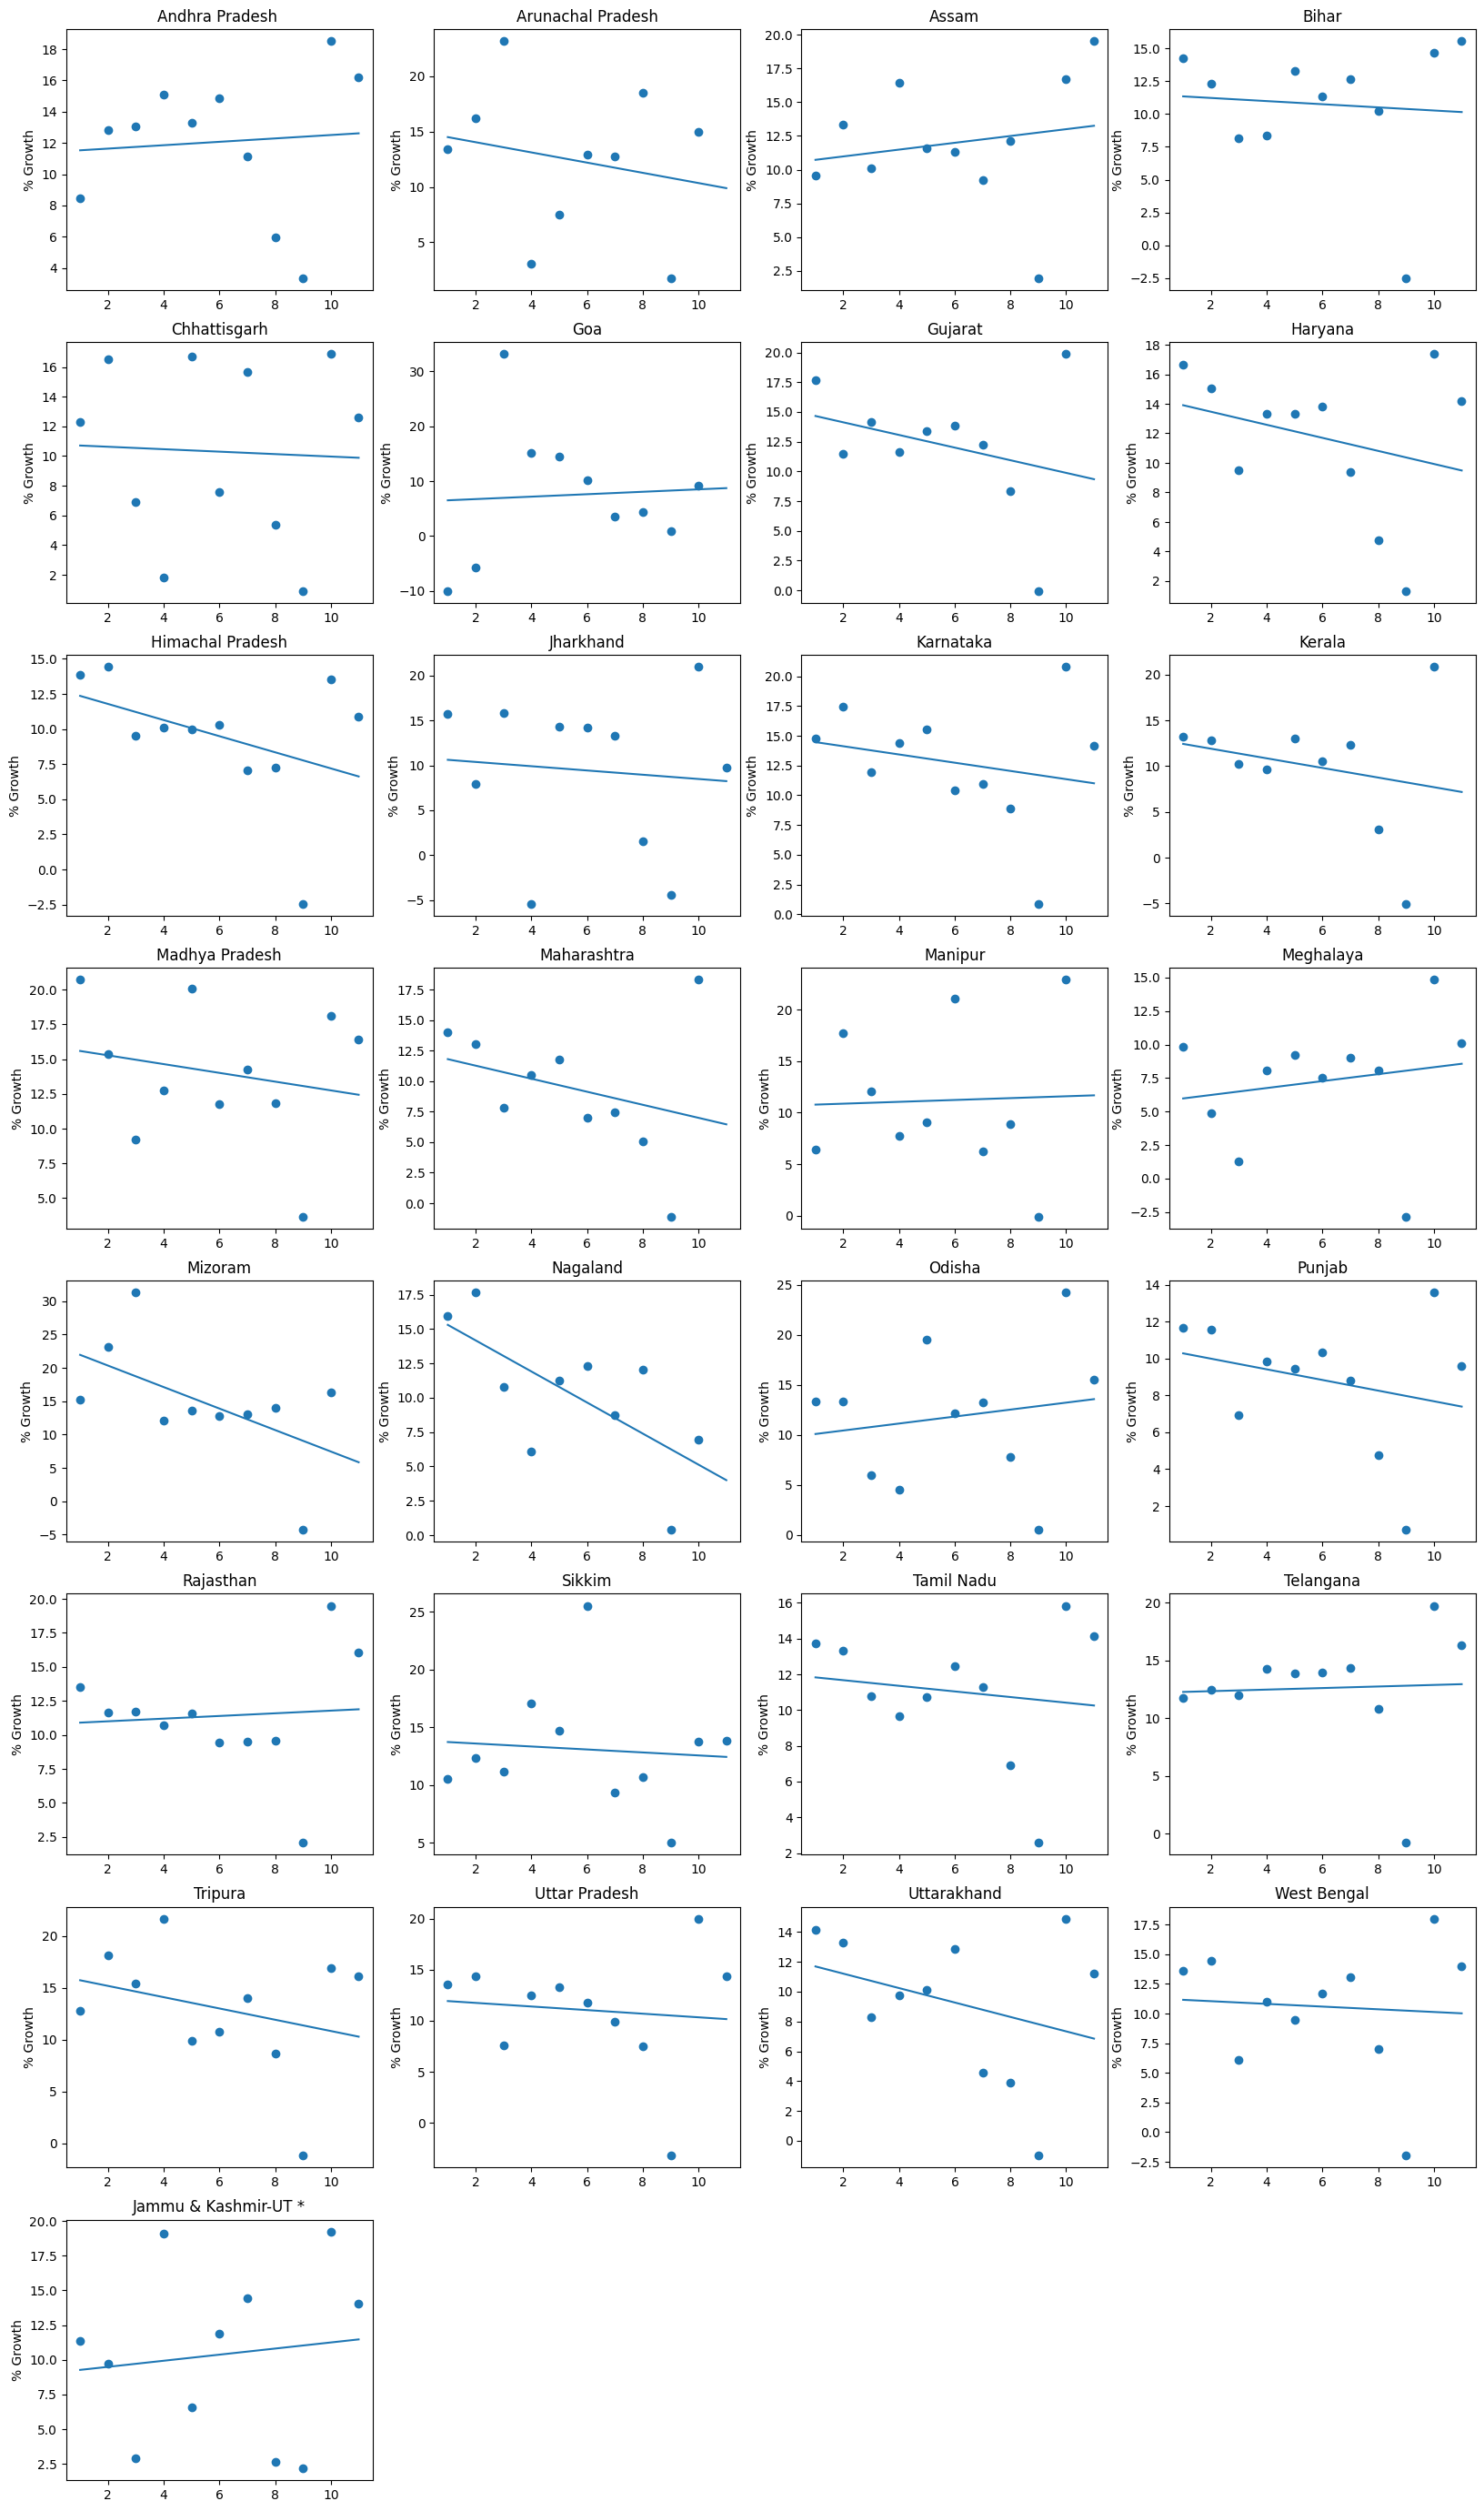

In [15]:
k = 0
plt.figure(figsize=(20, 35))

for i in range(len(state_list)):    
    k = k + 1
    plt.subplot(8, 4, k)
    
    # Handling the NaN values of the column by using only the finite values
    idx = np.isfinite(df_percent_of_growth['Year']) & np.isfinite(df_percent_of_growth[state_list[i]])
    
    # Taking slope (M) and Y-axis intersection (C)
    m, c = np.polyfit(df_percent_of_growth['Year'][idx], df_percent_of_growth[state_list[i]][idx], 1)
    
    # Update the scatter plot to use 'Year' as x-axis and state_list[i] as y-axis
    plt.scatter(df_percent_of_growth['Year'], df_percent_of_growth[state_list[i]])
    
    # Plot the linear regression line
    plt.plot(df_percent_of_growth['Year'], m * df_percent_of_growth['Year'] + c)   
    plt.title(state_list[i])
    plt.ylabel('% Growth')

#### Analysis
We can see from the above state wise percentage of GDP growth over previous year that few states are growing but few are not. The slope of the trend line tells us the growth rate of the states.

Eg:- Telengana GDP growth rate is increasing over the years.

Tamilnadu GDP growth rate is decreasing over the years.

Finally, Overall nation GDP growth rate is decreasing over the years.

In [16]:
#Dropping 'Year' column as we do not need it anymore for further analysis
df_percent_of_growth.drop('Year',axis=1,inplace=True)

In [17]:
# Setting 'Duration' column as index
df_percent_of_growth = df_percent_of_growth.set_index('State\\UT')
df_percent_of_growth

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Jammu & Kashmir-UT *
State\UT,,,,,,,,,,,,,,,,,,,,,
2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,15.77,...,11.67,13.50,10.51,13.75,11.73,12.78,13.58,14.12,13.64,11.35
2013-14,12.85,16.22,13.31,12.30,16.52,-5.77,11.47,15.05,14.42,7.92,...,11.56,11.65,12.35,13.30,12.45,18.14,14.34,13.27,14.44,9.74
2014-15,13.08,23.17,10.11,8.15,6.91,33.11,14.13,9.49,9.51,15.89,...,6.91,11.73,11.14,10.75,12.02,15.40,7.60,8.29,6.09,2.87
2015-16,15.10,3.06,16.47,8.35,1.83,15.14,11.63,13.35,10.09,-5.45,...,9.85,10.69,17.05,9.68,14.24,21.68,12.45,9.74,11.03,19.11
2016-17,13.27,7.53,11.59,13.31,16.72,14.39,13.43,13.30,9.97,14.34,...,9.46,11.61,14.71,10.72,13.92,9.86,13.26,10.14,9.44,6.55
2017-18,14.86,12.93,11.31,11.33,7.59,10.12,13.87,13.79,10.28,14.21,...,10.31,9.46,25.54,12.47,13.93,10.73,11.73,12.86,11.71,11.90
2018-19,11.14,12.73,9.24,12.64,15.69,3.61,12.27,9.41,7.10,13.30,...,8.81,9.49,9.36,11.27,14.32,13.97,9.88,4.58,13.07,14.42
2019-20,5.97,18.51,12.13,10.20,5.36,4.42,8.38,4.76,7.27,1.51,...,4.78,9.56,10.70,6.93,10.81,8.69,7.45,3.88,6.99,2.65
2020-21,3.34,1.75,1.95,-2.51,0.90,0.90,-0.06,1.32,-2.46,-4.40,...,0.71,2.08,5.02,2.58,-0.77,-1.19,-3.22,-1.00,-1.97,2.16


In [18]:
# Transposing the dataframe for the readablity.
df_percent_of_growth = df_percent_of_growth.transpose()
df_percent_of_growth

State\UT,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
Andhra Pradesh,8.43,12.85,13.08,15.10,13.27,14.86,11.14,5.97,3.34,18.50,16.22
Arunachal Pradesh,13.41,16.22,23.17,3.06,7.53,12.93,12.73,18.51,1.75,14.98,NaN
Assam,9.56,13.31,10.11,16.47,11.59,11.31,9.24,12.13,1.95,16.69,19.52
Bihar,14.25,12.30,8.15,8.35,13.31,11.33,12.64,10.20,-2.51,14.64,15.55
Chhattisgarh,12.30,16.52,6.91,1.83,16.72,7.59,15.69,5.36,0.90,16.87,12.60
Goa,-10.02,-5.77,33.11,15.14,14.39,10.12,3.61,4.42,0.90,9.11,NaN
Gujarat,17.69,11.47,14.13,11.63,13.43,13.87,12.27,8.38,-0.06,19.86,NaN
Haryana,16.63,15.05,9.49,13.35,13.30,13.79,9.41,4.76,1.32,17.36,14.18
Himachal Pradesh,13.89,14.42,9.51,10.09,9.97,10.28,7.10,7.27,-2.46,13.54,10.86
Jharkhand,15.77,7.92,15.89,-5.45,14.34,14.21,13.30,1.51,-4.40,20.97,9.71


In [19]:
# Adding new column 'Avg. GDP Growth'
df_percent_of_growth['Avg. GDP Growth'] = round(df_percent_of_growth.mean(axis=1),2)
df_percent_of_growth

State\UT,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,Avg. GDP Growth
Andhra Pradesh,8.43,12.85,13.08,15.10,13.27,14.86,11.14,5.97,3.34,18.50,16.22,12.07
Arunachal Pradesh,13.41,16.22,23.17,3.06,7.53,12.93,12.73,18.51,1.75,14.98,NaN,12.43
Assam,9.56,13.31,10.11,16.47,11.59,11.31,9.24,12.13,1.95,16.69,19.52,11.99
Bihar,14.25,12.30,8.15,8.35,13.31,11.33,12.64,10.20,-2.51,14.64,15.55,10.75
Chhattisgarh,12.30,16.52,6.91,1.83,16.72,7.59,15.69,5.36,0.90,16.87,12.60,10.30
Goa,-10.02,-5.77,33.11,15.14,14.39,10.12,3.61,4.42,0.90,9.11,NaN,7.50
Gujarat,17.69,11.47,14.13,11.63,13.43,13.87,12.27,8.38,-0.06,19.86,NaN,12.27
Haryana,16.63,15.05,9.49,13.35,13.30,13.79,9.41,4.76,1.32,17.36,14.18,11.70
Himachal Pradesh,13.89,14.42,9.51,10.09,9.97,10.28,7.10,7.27,-2.46,13.54,10.86,9.50
Jharkhand,15.77,7.92,15.89,-5.45,14.34,14.21,13.30,1.51,-4.40,20.97,9.71,9.43


In [20]:
# Sorting the states by 'Avg. GDP Growth'
df_percent_of_growth = df_percent_of_growth.sort_values(by='Avg. GDP Growth')
df_percent_of_growth

State\UT,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,Avg. GDP Growth
Meghalaya,9.81,4.87,1.29,8.10,9.24,7.54,9.04,8.06,-2.86,14.83,10.09,7.28
Goa,-10.02,-5.77,33.11,15.14,14.39,10.12,3.61,4.42,0.90,9.11,NaN,7.50
Punjab,11.67,11.56,6.91,9.85,9.46,10.31,8.81,4.78,0.71,13.57,9.59,8.84
Uttarakhand,14.12,13.27,8.29,9.74,10.14,12.86,4.58,3.88,-1.00,14.90,11.19,9.27
Maharashtra,14.00,13.02,7.85,10.52,11.80,7.03,7.48,5.08,-1.12,18.29,NaN,9.39
Jharkhand,15.77,7.92,15.89,-5.45,14.34,14.21,13.30,1.51,-4.40,20.97,9.71,9.43
Himachal Pradesh,13.89,14.42,9.51,10.09,9.97,10.28,7.10,7.27,-2.46,13.54,10.86,9.50
Kerala,13.26,12.79,10.22,9.64,12.97,10.51,12.36,3.13,-5.07,20.83,NaN,10.06
Nagaland,15.97,17.64,10.77,6.10,11.26,12.29,8.75,12.02,0.39,6.98,NaN,10.22
Chhattisgarh,12.30,16.52,6.91,1.83,16.72,7.59,15.69,5.36,0.90,16.87,12.60,10.30


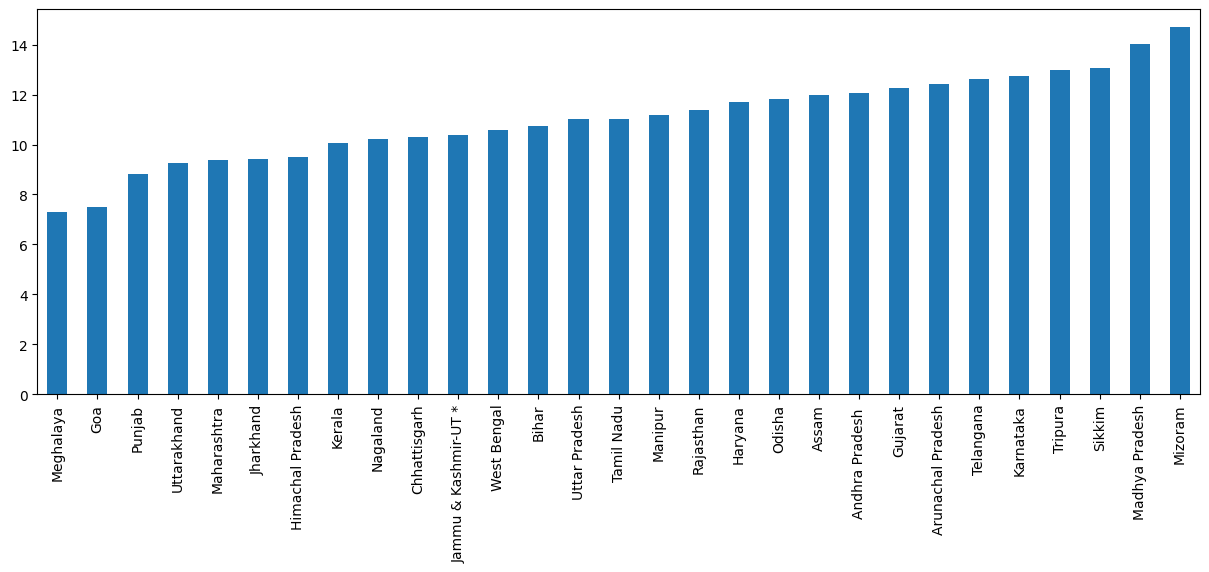

In [21]:
# Plotting 'Avg. GDP Growth' for all the states
plt.figure(figsize=(15,5))
df_percent_of_growth['Avg. GDP Growth'].plot(kind='bar',)
plt.show()

### Answers
#### How will you compare the growth rates of any two states?
The above graph shows the average growth rate of all the states in ascending order. So, we can compare the growth rates of any two states from the above graph.

#### Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states?
`Meghalya` has been growing consistently fast.
`Goa` has been struggling.

**Top 3 fastest growing states:-**
1. Mizroram
2. Madhya Pradesh
3. Sikkim

**3 slowest growing states:-**
1. Meghalaya
2. Goa
3. Punjab

#### What is the Nation's average?
Nations average is `11.05` 

# Total GDP of the states for the year 2021-22

In [22]:
# Creating dataframe only with GDP of the states for the year 2021-22 
df_GSDP_2021_22 = df_GSDP[['State\\UT','2021-22']]
df_GSDP_2021_22

,State\UT,2021-22
0,Andhra Pradesh,1133836.50
1,Arunachal Pradesh,35123.54
2,Assam,412611.87
3,Bihar,650302.43
4,Chhattisgarh,406415.82
5,Goa,82603.70
6,Gujarat,1937066.46
7,Haryana,870664.53
8,Himachal Pradesh,176269.47
9,Jharkhand,358862.59


In [23]:
# Sorting the states by the GDP
df_GSDP_2021_22 = df_GSDP_2021_22.sort_values(by='2021-22')
df_GSDP_2021_22

,State\UT,2021-22
16,Mizoram,27823.50
17,Nagaland,31912.54
1,Arunachal Pradesh,35123.54
14,Manipur,36594.47
21,Sikkim,37557.40
15,Meghalaya,38784.70
24,Tripura,62550.44
5,Goa,82603.70
8,Himachal Pradesh,176269.47
31,Jammu & Kashmir-UT *,199917.42


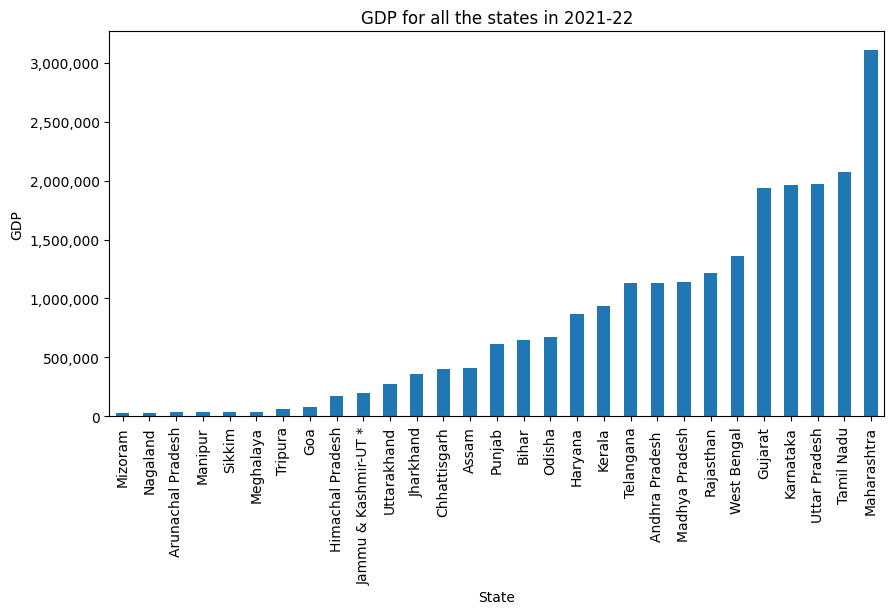

In [24]:
# Convert the '2021-22' column to integer
df_GSDP_2021_22['2021-22'] = df_GSDP_2021_22['2021-22'].astype(int)

# Create a custom formatter to display integers without scientific notation
def integer_formatter(x, pos):
    return f'{int(x):,}'  # Format the integer with thousands separators


# Plot the data
ax = df_GSDP_2021_22.plot(x='State\\UT', y='2021-22', kind='bar',figsize=(10,5), legend=False)

plt.ylabel('GDP')
plt.title('GDP for all the states in 2021-22')
plt.xticks(rotation=90)
plt.xlabel('State')

# Apply the custom formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(integer_formatter))

plt.show()


# Answers

#### Which Plot will you use for this? Why?
It will be more convinient to use bar chart as it dispalys and compares the numbers. Each bar represents individual state and the length of the bar tells us the GDP of the state.

#### Identify the top 5 and the bottom 5 states based on total GDP.
##### Top 5 states:-
1. Mahrashtra
2. Tamilnadu
3. Uttar Pradesh
4. Karnataka
5. Gujrat


##### Bottom 5 states:-
1. Sikkim
2. Manipur
3. Arunachal Pradesh
3. Nagaland
5. Mizoram 

# Part I-B: 

In [25]:
df_GSVA = pd.read_excel('C:/Users/Sushant/OneDrive/Desktop/theforage/Project/Python/GSVA/GSVA in .csv/GSVA Compiled.xlsx')
df_GSVA

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,Other services,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
0,Andhra Pradesh,38845328,2770752.00,11152836,3284859,7183889,7203743,8360105,4727354,8627423,...,8051485,41616080,21621584,40780986,104018650,11200000.00,1835000.00,113383650,522510,216998
1,Arunachal Pradesh,1242237,66688.00,25718,417693,243122,104217,79221,31527,59915,...,523238,1308925,686533,1341650,3337108,216748.00,41502.00,3512354,15400,228075
2,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,...,3879171,12840330,7781500,16881568,37503398,4358877.00,601088.00,41261187,352702,116986
3,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,...,9259093,16072072,11570756,36590136,64232964,5643407.00,4846128.00,65030243,1241540,52379
4,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,...,3024425,11997894,12912853,13632900,38543647,2097935.00,NaN,40641582,296930,136873
5,Goa,581816,7351.00,2834061,850150,229952,614999,297427,382590,608184,...,434618,589167,3914164,3014846,7518176,799233.87,57040.14,8260370,15670,527146
6,Gujarat,27144843,5684700.00,63112285,5078575,10171380,20021264,9248704,8696299,10127760,...,6168028,32829543,78362240,59168503,170360286,25579860.50,2233500.00,193706646,702890,275586
7,Haryana,14856632,128194.00,15878686,1756490,5610128,9906091,3908588,3514796,13537729,...,4789541,14984826,23245304,37863376,76093506,11871548.00,898601.00,87066453,294220,295923
8,Himachal Pradesh,2186611,40622.00,5198810,938292,1031480,1472103,847105,498226,1776370,...,1732007,2227234,7168581,7248420,16644235,1210797.00,228085.00,17626947,74150,237720
9,Jammu & Kashmir,3175760,53172.00,1627886,940064,1307008,1669857,1300805,566761,2058005,...,1739308,3228933,3874959,11198205,18302096,2034028.54,344383.00,19991742,134650,148472


In [26]:
# Renaming 'Population (\'00)' to 'Population'
df_GSVA.rename(columns={'Population (\'00)':'Population'},inplace=True)
columns_to_round = ['Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Primary',
 'Manufacturing',
 'Electricity, gas, water supply & other utility services',
 'Construction',
 'Secondary',
 'Trade, repair, hotels and restaurants',
 'Transport, storage, communication & services related to broadcasting',
 'Financial services',
 'Real estate, ownership of dwelling & professional services',
 'Public administration',
 'Other services',
 'Tertiary',
 'Gross State Domestic Product',
 'Population',
 'Per Capita GSDP (Rs.)']
for column in columns_to_round:
    df_GSVA[column] = df_GSVA[column].round(0)
df_GSVA

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,Other services,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
0,Andhra Pradesh,38845328,2770752.00,11152836,3284859,7183889,7203743,8360105,4727354,8627423,...,8051485,41616080,21621584,40780986,104018650,11200000.00,1835000.00,113383650,522510,216998
1,Arunachal Pradesh,1242237,66688.00,25718,417693,243122,104217,79221,31527,59915,...,523238,1308925,686533,1341650,3337108,216748.00,41502.00,3512354,15400,228075
2,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,...,3879171,12840330,7781500,16881568,37503398,4358877.00,601088.00,41261187,352702,116986
3,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,...,9259093,16072072,11570756,36590136,64232964,5643407.00,4846128.00,65030243,1241540,52379
4,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,...,3024425,11997894,12912853,13632900,38543647,2097935.00,NaN,40641582,296930,136873
5,Goa,581816,7351.00,2834061,850150,229952,614999,297427,382590,608184,...,434618,589167,3914164,3014846,7518176,799233.87,57040.14,8260370,15670,527146
6,Gujarat,27144843,5684700.00,63112285,5078575,10171380,20021264,9248704,8696299,10127760,...,6168028,32829543,78362240,59168503,170360286,25579860.50,2233500.00,193706646,702890,275586
7,Haryana,14856632,128194.00,15878686,1756490,5610128,9906091,3908588,3514796,13537729,...,4789541,14984826,23245304,37863376,76093506,11871548.00,898601.00,87066453,294220,295923
8,Himachal Pradesh,2186611,40622.00,5198810,938292,1031480,1472103,847105,498226,1776370,...,1732007,2227234,7168581,7248420,16644235,1210797.00,228085.00,17626947,74150,237720
9,Jammu & Kashmir,3175760,53172.00,1627886,940064,1307008,1669857,1300805,566761,2058005,...,1739308,3228933,3874959,11198205,18302096,2034028.54,344383.00,19991742,134650,148472


In [27]:
# Converting all the columns from object to numeric (except State column) for further numeric calculation

columns_to_convert = df_GSVA.columns.difference(['State'])  # Exclude 'State' column
df_GSVA[columns_to_convert] = df_GSVA[columns_to_convert].apply(pd.to_numeric)
df_GSVA

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,Other services,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
0,Andhra Pradesh,38845328,2770752.00,11152836,3284859,7183889,7203743,8360105,4727354,8627423,...,8051485,41616080,21621584,40780986,104018650,11200000.00,1835000.00,113383650,522510,216998
1,Arunachal Pradesh,1242237,66688.00,25718,417693,243122,104217,79221,31527,59915,...,523238,1308925,686533,1341650,3337108,216748.00,41502.00,3512354,15400,228075
2,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,...,3879171,12840330,7781500,16881568,37503398,4358877.00,601088.00,41261187,352702,116986
3,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,...,9259093,16072072,11570756,36590136,64232964,5643407.00,4846128.00,65030243,1241540,52379
4,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,...,3024425,11997894,12912853,13632900,38543647,2097935.00,NaN,40641582,296930,136873
5,Goa,581816,7351.00,2834061,850150,229952,614999,297427,382590,608184,...,434618,589167,3914164,3014846,7518176,799233.87,57040.14,8260370,15670,527146
6,Gujarat,27144843,5684700.00,63112285,5078575,10171380,20021264,9248704,8696299,10127760,...,6168028,32829543,78362240,59168503,170360286,25579860.50,2233500.00,193706646,702890,275586
7,Haryana,14856632,128194.00,15878686,1756490,5610128,9906091,3908588,3514796,13537729,...,4789541,14984826,23245304,37863376,76093506,11871548.00,898601.00,87066453,294220,295923
8,Himachal Pradesh,2186611,40622.00,5198810,938292,1031480,1472103,847105,498226,1776370,...,1732007,2227234,7168581,7248420,16644235,1210797.00,228085.00,17626947,74150,237720
9,Jammu & Kashmir,3175760,53172.00,1627886,940064,1307008,1669857,1300805,566761,2058005,...,1739308,3228933,3874959,11198205,18302096,2034028.54,344383.00,19991742,134650,148472


In [28]:
# Sorting 'df_GSVA_all_states' by 'Per Capita GSDP (Rs.)'
df_GSVA = df_GSVA.sort_values(by='Per Capita GSDP (Rs.)')
df_GSVA

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,Other services,Primary,Secondary,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population,Per Capita GSDP (Rs.)
3,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,...,9259093,16072072,11570756,36590136,64232964,5643407.00,4846128.00,65030243,1241540,52379
26,Uttar Pradesh,46761959,1559407.00,22432199,5562812,20839861,14871994,13933630,6255925,25928712,...,10323460,48321366,48834872,83573385,180729623,23614355.00,6890823.00,197453155,2346750,84139
10,Jharkhand,6078269,2049263.00,6945527,717537,3020358,3888157,2591025,937597,2792276,...,2266632,8127532,10683422,14510659,33321613,3819415.00,1254769.00,35886259,387620,92581
15,Manipur,923521,NaN,55589,66004,170733,379953,214714,77131,209220,...,703468,923521,292326,2235446,3451293,274203.00,66049.00,3659447,35905,101920
16,Meghalaya,792416,52725.00,322865,83025,236992,753878,249131,97914,189371,...,410449,845141,642882,2177826,3665849,295985.00,83364.00,3878470,33330,116366
2,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,...,3879171,12840330,7781500,16881568,37503398,4358877.00,601088.00,41261187,352702,116986
13,Madhya Pradesh,47619891,3385343.00,8998570,3630408,7925909,9533222,5025799,3618964,5099872,...,6576567,51005234,20554887,35055890,106616011,11434872.00,4437164.00,113613719,851180,133478
4,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,...,3024425,11997894,12912853,13632900,38543647,2097935.00,NaN,40641582,296930,136873
28,West Bengal,27404777,1106960.00,17310596,2361288,10363809,20688095,7279007,5818345,18915594,...,11696504,28511737,30035693,71398427,129945858,11201811.00,4755083.00,136392586,984040,138605
18,Nagaland,768735,23927.00,31846,64568,248480,251916,140867,205994,189219,...,518601,792662,344894,1922773,3060329,197122.00,66197.00,3191254,22130,144205


In [29]:
# GDP per capita for all the states 
# Setting 'State' as index
df_per_capita = df_GSVA[['State','Per Capita GSDP (Rs.)']]
df_per_capita = df_per_capita.set_index('State')
df_per_capita['Per Capita GSDP (Rs.)'] = df_per_capita['Per Capita GSDP (Rs.)'].round(2)
df_per_capita

,Per Capita GSDP (Rs.)
State,
Bihar,52379
Uttar Pradesh,84139
Jharkhand,92581
Manipur,101920
Meghalaya,116366
Assam,116986
Madhya Pradesh,133478
Chhattisgarh,136873
West Bengal,138605


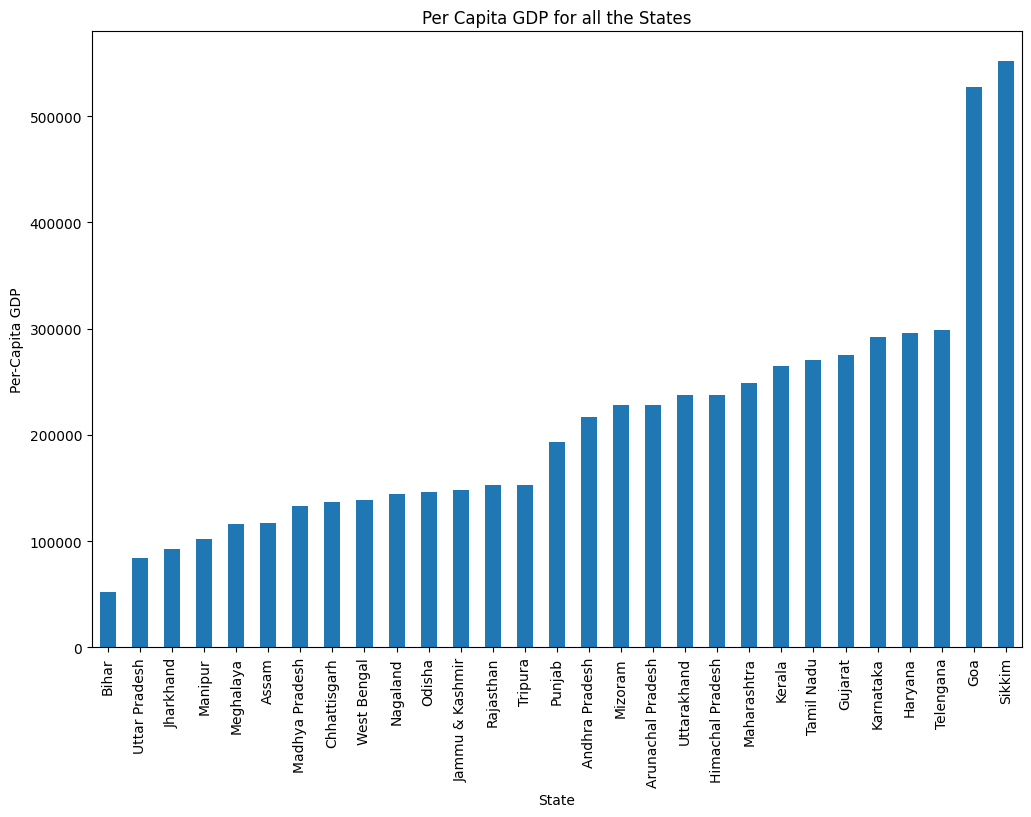

In [30]:
# Plotting per capita for all the states
df_per_capita['Per Capita GSDP (Rs.)'].plot(kind='bar',figsize=(12,8))
plt.ylabel('Per-Capita GDP')
plt.title('Per Capita GDP for all the States')
plt.show()

In [31]:
# Ratio of the highest per capita GDP to the lowest per capita GDP.
round(df_per_capita['Per Capita GSDP (Rs.)'].max()/df_per_capita['Per Capita GSDP (Rs.)'].min(),2)

10.54

# Answers
#### Identify the top 5 and the bottom 5 states based on the GDP per capita.
##### Top 5 states:-
1. Sikkim
2. Goa
3. Telangana 
4. Haryana
5. Karnataka 

##### Bottom 5 states:-
1. Bihar
2. Uttar Pradesh
3. Jharkhand
4. Manipur
5. Meghalaya

#### Find the ratio of the highest per capita GDP to the lowest per capita GDP.
`10.5`

In [32]:
# % contribution of Primary sector to total GDP of the states
df_GSVA['% Primary contribution'] = round(((df_GSVA['Primary']/df_GSVA['Gross State Domestic Product'])*100),2)
df_GSVA['% Secondary contribution'] = round(((df_GSVA['Secondary']/df_GSVA['Gross State Domestic Product'])*100),2)
df_GSVA['% Tertiary contribution'] = round(((df_GSVA['Tertiary']/df_GSVA['Gross State Domestic Product'])*100),2)
df_GSVA

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution
3,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,...,36590136,64232964,5643407.00,4846128.00,65030243,1241540,52379,24.71,17.79,56.27
26,Uttar Pradesh,46761959,1559407.00,22432199,5562812,20839861,14871994,13933630,6255925,25928712,...,83573385,180729623,23614355.00,6890823.00,197453155,2346750,84139,24.47,24.73,42.33
10,Jharkhand,6078269,2049263.00,6945527,717537,3020358,3888157,2591025,937597,2792276,...,14510659,33321613,3819415.00,1254769.00,35886259,387620,92581,22.65,29.77,40.44
15,Manipur,923521,NaN,55589,66004,170733,379953,214714,77131,209220,...,2235446,3451293,274203.00,66049.00,3659447,35905,101920,25.24,7.99,61.09
16,Meghalaya,792416,52725.00,322865,83025,236992,753878,249131,97914,189371,...,2177826,3665849,295985.00,83364.00,3878470,33330,116366,21.79,16.58,56.15
2,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,...,16881568,37503398,4358877.00,601088.00,41261187,352702,116986,31.12,18.86,40.91
13,Madhya Pradesh,47619891,3385343.00,8998570,3630408,7925909,9533222,5025799,3618964,5099872,...,35055890,106616011,11434872.00,4437164.00,113613719,851180,133478,44.89,18.09,30.86
4,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,...,13632900,38543647,2097935.00,NaN,40641582,296930,136873,29.52,31.77,33.54
28,West Bengal,27404777,1106960.00,17310596,2361288,10363809,20688095,7279007,5818345,18915594,...,71398427,129945858,11201811.00,4755083.00,136392586,984040,138605,20.90,22.02,52.35
18,Nagaland,768735,23927.00,31846,64568,248480,251916,140867,205994,189219,...,1922773,3060329,197122.00,66197.00,3191254,22130,144205,24.84,10.81,60.25


In [33]:
# Creating dataframe 'df_sector_contribution'
# and the columns of sector wise percenrage contribution in total GSDP
# Setting 'State' as index
df_sector_contribution = df_GSVA[['State','% Primary contribution','% Secondary contribution','% Tertiary contribution']] 
df_sector_contribution = df_sector_contribution.set_index('State')
df_sector_contribution

,% Primary contribution,% Secondary contribution,% Tertiary contribution
State,,,
Bihar,24.71,17.79,56.27
Uttar Pradesh,24.47,24.73,42.33
Jharkhand,22.65,29.77,40.44
Manipur,25.24,7.99,61.09
Meghalaya,21.79,16.58,56.15
Assam,31.12,18.86,40.91
Madhya Pradesh,44.89,18.09,30.86
Chhattisgarh,29.52,31.77,33.54
West Bengal,20.90,22.02,52.35


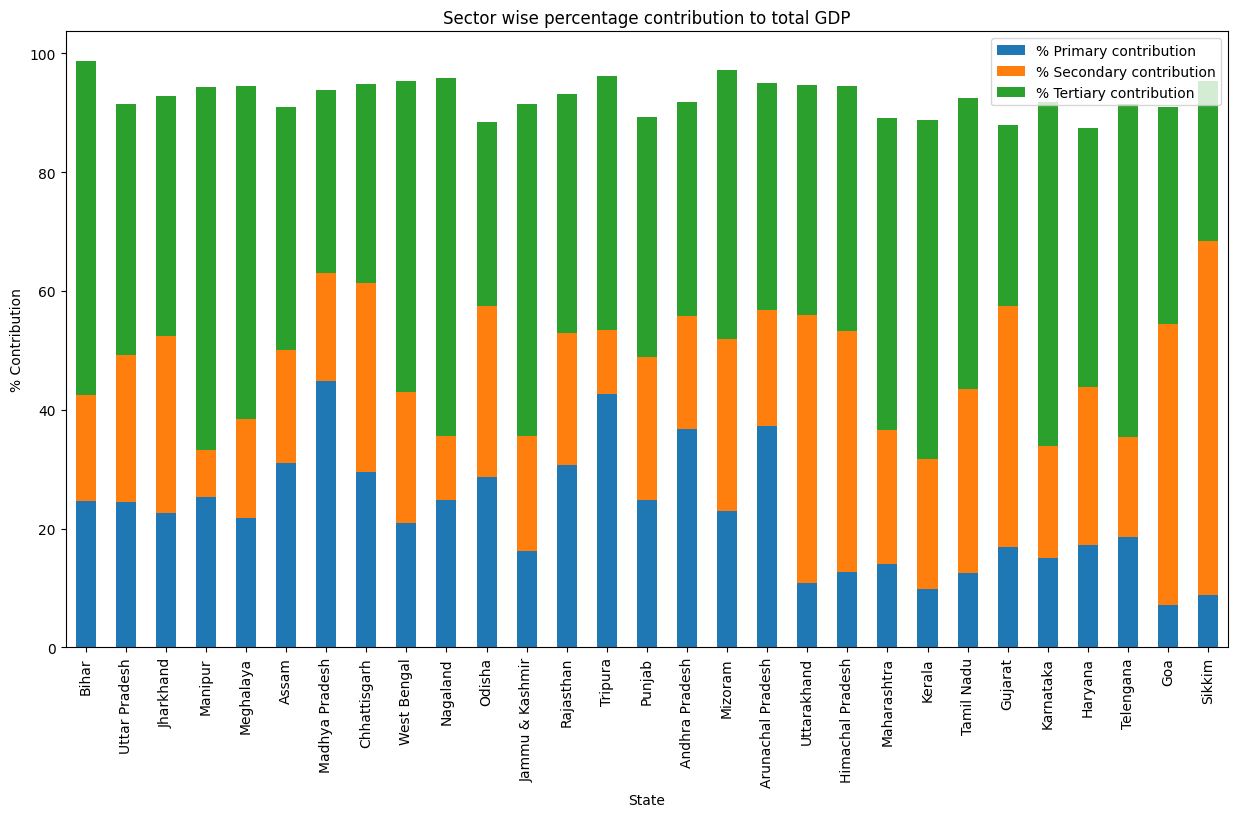

In [34]:
# Plotting sector wise percentage contribution to GSDP for all the states
df_sector_contribution.plot(kind='bar',stacked=True,figsize=(15, 8))
plt.ylabel('% Contribution')
plt.title('Sector wise percentage contribution to total GDP')
plt.show()

In [35]:
# Correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.
# The lowest per capita GDP State Bihar is ranked 1
# The highest per capita GDP state Goa is ranked 27
df_GSVA['Percentile Rank'] = df_GSVA['Per Capita GSDP (Rs.)'].rank()
df_GSVA

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution,Percentile Rank
3,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,...,64232964,5643407.00,4846128.00,65030243,1241540,52379,24.71,17.79,56.27,1.00
26,Uttar Pradesh,46761959,1559407.00,22432199,5562812,20839861,14871994,13933630,6255925,25928712,...,180729623,23614355.00,6890823.00,197453155,2346750,84139,24.47,24.73,42.33,2.00
10,Jharkhand,6078269,2049263.00,6945527,717537,3020358,3888157,2591025,937597,2792276,...,33321613,3819415.00,1254769.00,35886259,387620,92581,22.65,29.77,40.44,3.00
15,Manipur,923521,NaN,55589,66004,170733,379953,214714,77131,209220,...,3451293,274203.00,66049.00,3659447,35905,101920,25.24,7.99,61.09,4.00
16,Meghalaya,792416,52725.00,322865,83025,236992,753878,249131,97914,189371,...,3665849,295985.00,83364.00,3878470,33330,116366,21.79,16.58,56.15,5.00
2,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,...,37503398,4358877.00,601088.00,41261187,352702,116986,31.12,18.86,40.91,6.00
13,Madhya Pradesh,47619891,3385343.00,8998570,3630408,7925909,9533222,5025799,3618964,5099872,...,106616011,11434872.00,4437164.00,113613719,851180,133478,44.89,18.09,30.86,7.00
4,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,...,38543647,2097935.00,NaN,40641582,296930,136873,29.52,31.77,33.54,8.00
28,West Bengal,27404777,1106960.00,17310596,2361288,10363809,20688095,7279007,5818345,18915594,...,129945858,11201811.00,4755083.00,136392586,984040,138605,20.90,22.02,52.35,9.00
18,Nagaland,768735,23927.00,31846,64568,248480,251916,140867,205994,189219,...,3060329,197122.00,66197.00,3191254,22130,144205,24.84,10.81,60.25,10.00


In [36]:
# Correlation in 'Pearson' method
df_corr_rank_primary = df_GSVA[['% Primary contribution','Percentile Rank']]
df_corr_rank_primary.corr(method ='pearson')

,% Primary contribution,Percentile Rank
% Primary contribution,1.00,-0.55
Percentile Rank,-0.55,1.00


# Answers
#### Which plot will you use here? Why?
We can use stacked bar graph beacuse it is used to show comparisions between categories of data.
#### Why is (Primary + Secondary + Tertiary) not equal to total GDP?
Total GDP = (Primary + Secondary + Tertiary)+(Taxes on Products)-(Subsidies on products)


#### Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP.
There is a negative correlation between 'the rank of the states based of their per capita GDP' and 'primary sector contribution to the GDP'.

Correlation = `-.53`

Insights we can draw:- 
1. The higher the per capita GDP of the states, the lesser those states are dependent on primary sector.
2. The lower the per capita GDP of the states, the higher those states are dependent on primary sector.

#### Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

In [37]:
# Taking the quantile values for each category
val_C1 = df_GSVA['Per Capita GSDP (Rs.)'].quantile([1]).values
val_C2 = df_GSVA['Per Capita GSDP (Rs.)'].quantile([.85]).values
val_C3 = df_GSVA['Per Capita GSDP (Rs.)'].quantile([.50]).values
val_C4 = df_GSVA['Per Capita GSDP (Rs.)'].quantile([.20]).values
print(val_C1)
print(val_C2)
print(val_C3)
print(val_C4)

[552315.]
[289150.8]
[192919.]
[126881.2]


In [38]:
# Defining a function for categorizing the states
def state_category(x):
    if ((x>=0) and (x<val_C4)):
        return 'C4'
    elif ((x>=val_C4) and (x<val_C3)):
        return 'C3'
    elif ((x>=val_C3) and (x<val_C2)):
        return 'C2'
    else:
        return 'C1'

In [39]:
# Creating 'Category' column
# Applying the above 'state_category' function to 'Per Capita GSDP (Rs.)' column
df_GSVA['Category'] = df_GSVA['Per Capita GSDP (Rs.)'].apply(state_category)
df_GSVA

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution,Percentile Rank,Category
3,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,...,5643407.00,4846128.00,65030243,1241540,52379,24.71,17.79,56.27,1.00,C4
26,Uttar Pradesh,46761959,1559407.00,22432199,5562812,20839861,14871994,13933630,6255925,25928712,...,23614355.00,6890823.00,197453155,2346750,84139,24.47,24.73,42.33,2.00,C4
10,Jharkhand,6078269,2049263.00,6945527,717537,3020358,3888157,2591025,937597,2792276,...,3819415.00,1254769.00,35886259,387620,92581,22.65,29.77,40.44,3.00,C4
15,Manipur,923521,NaN,55589,66004,170733,379953,214714,77131,209220,...,274203.00,66049.00,3659447,35905,101920,25.24,7.99,61.09,4.00,C4
16,Meghalaya,792416,52725.00,322865,83025,236992,753878,249131,97914,189371,...,295985.00,83364.00,3878470,33330,116366,21.79,16.58,56.15,5.00,C4
2,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,...,4358877.00,601088.00,41261187,352702,116986,31.12,18.86,40.91,6.00,C4
13,Madhya Pradesh,47619891,3385343.00,8998570,3630408,7925909,9533222,5025799,3618964,5099872,...,11434872.00,4437164.00,113613719,851180,133478,44.89,18.09,30.86,7.00,C3
4,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,...,2097935.00,NaN,40641582,296930,136873,29.52,31.77,33.54,8.00,C3
28,West Bengal,27404777,1106960.00,17310596,2361288,10363809,20688095,7279007,5818345,18915594,...,11201811.00,4755083.00,136392586,984040,138605,20.90,22.02,52.35,9.00,C3
18,Nagaland,768735,23927.00,31846,64568,248480,251916,140867,205994,189219,...,197122.00,66197.00,3191254,22130,144205,24.84,10.81,60.25,10.00,C3



# Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

# C1 states

In [40]:
# Creating dataframe for C1 states
# Taking only sub sectors columns and total GSDP
df_state_C1 = df_GSVA[df_GSVA['Category']=='C1']
df_state_C1 = df_state_C1[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C1

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
11,Karnataka,27679658,1992540.00,24750994,2499446,9448475,17912511,8844606,8357533,61903430,4958544,11821779,196272542
7,Haryana,14856632,128194.00,15878686,1756490,5610128,9906091,3908588,3514796,13537729,2206632,4789541,87066453
24,Telengana,18557287,2482891.00,12474019,1831067,4667585,16699534,7197902,5156257,23725199,2783342,7757147,112890724
5,Goa,581816,7351.00,2834061,850150,229952,614999,297427,382590,608184,677029,434618,8260370
22,Sikkim,327481,1269.00,1345203,737105,157448,212786,78715,45671,119898,243765,313175,3755740


In [41]:
# Transposing 'df_state_C1'
df_state_C1 = df_state_C1.T
df_state_C1

,11,7,24,5,22
State,Karnataka,Haryana,Telengana,Goa,Sikkim
"Agriculture, forestry and fishing",27679658,14856632,18557287,581816,327481
Mining and quarrying,1992540.00,128194.00,2482891.00,7351.00,1269.00
Manufacturing,24750994,15878686,12474019,2834061,1345203
"Electricity, gas, water supply & other utility services",2499446,1756490,1831067,850150,737105
Construction,9448475,5610128,4667585,229952,157448
"Trade, repair, hotels and restaurants",17912511,9906091,16699534,614999,212786
"Transport, storage, communication & services related to broadcasting",8844606,3908588,7197902,297427,78715
Financial services,8357533,3514796,5156257,382590,45671
"Real estate, ownership of dwelling & professional services",61903430,13537729,23725199,608184,119898


In [42]:
# Creating column header with States name
header = df_state_C1.iloc[0]
df_state_C1 = df_state_C1[1:]
df_state_C1.columns = header
df_state_C1

State,Karnataka,Haryana,Telengana,Goa,Sikkim
"Agriculture, forestry and fishing",27679658,14856632,18557287,581816,327481
Mining and quarrying,1992540.00,128194.00,2482891.00,7351.00,1269.00
Manufacturing,24750994,15878686,12474019,2834061,1345203
"Electricity, gas, water supply & other utility services",2499446,1756490,1831067,850150,737105
Construction,9448475,5610128,4667585,229952,157448
"Trade, repair, hotels and restaurants",17912511,9906091,16699534,614999,212786
"Transport, storage, communication & services related to broadcasting",8844606,3908588,7197902,297427,78715
Financial services,8357533,3514796,5156257,382590,45671
"Real estate, ownership of dwelling & professional services",61903430,13537729,23725199,608184,119898
Public administration,4958544,2206632,2783342,677029,243765


In [43]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C1['Total'] = df_state_C1['Karnataka']+df_state_C1['Haryana']+df_state_C1['Telengana']+df_state_C1['Goa']+df_state_C1['Sikkim']
df_state_C1

State,Karnataka,Haryana,Telengana,Goa,Sikkim,Total
"Agriculture, forestry and fishing",27679658,14856632,18557287,581816,327481,62002874
Mining and quarrying,1992540.00,128194.00,2482891.00,7351.00,1269.00,4612245.00
Manufacturing,24750994,15878686,12474019,2834061,1345203,57282963
"Electricity, gas, water supply & other utility services",2499446,1756490,1831067,850150,737105,7674258
Construction,9448475,5610128,4667585,229952,157448,20113588
"Trade, repair, hotels and restaurants",17912511,9906091,16699534,614999,212786,45345921
"Transport, storage, communication & services related to broadcasting",8844606,3908588,7197902,297427,78715,20327238
Financial services,8357533,3514796,5156257,382590,45671,17456847
"Real estate, ownership of dwelling & professional services",61903430,13537729,23725199,608184,119898,99894440
Public administration,4958544,2206632,2783342,677029,243765,10869312


In [44]:
# Converting all the columns data type to numeric
df_state_C1[df_state_C1.columns] = df_state_C1[df_state_C1.columns].apply(pd.to_numeric)

In [45]:
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP 
df_state_C1['% Sub Sector Contribution'] = round(((df_state_C1['Total']/df_state_C1.at['Gross State Domestic Product','Total'])*100),2)
df_state_C1

State,Karnataka,Haryana,Telengana,Goa,Sikkim,Total,% Sub Sector Contribution
"Agriculture, forestry and fishing",27679658,14856632,18557287,581816,327481,62002874,15.19
Mining and quarrying,1992540,128194,2482891,7351,1269,4612245,1.13
Manufacturing,24750994,15878686,12474019,2834061,1345203,57282963,14.03
"Electricity, gas, water supply & other utility services",2499446,1756490,1831067,850150,737105,7674258,1.88
Construction,9448475,5610128,4667585,229952,157448,20113588,4.93
"Trade, repair, hotels and restaurants",17912511,9906091,16699534,614999,212786,45345921,11.11
"Transport, storage, communication & services related to broadcasting",8844606,3908588,7197902,297427,78715,20327238,4.98
Financial services,8357533,3514796,5156257,382590,45671,17456847,4.28
"Real estate, ownership of dwelling & professional services",61903430,13537729,23725199,608184,119898,99894440,24.47
Public administration,4958544,2206632,2783342,677029,243765,10869312,2.66


In [46]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C1 = df_state_C1.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C1 = df_state_C1.drop('Gross State Domestic Product')
df_state_C1

State,Karnataka,Haryana,Telengana,Goa,Sikkim,Total,% Sub Sector Contribution
"Real estate, ownership of dwelling & professional services",61903430,13537729,23725199,608184,119898,99894440,24.47
"Agriculture, forestry and fishing",27679658,14856632,18557287,581816,327481,62002874,15.19
Manufacturing,24750994,15878686,12474019,2834061,1345203,57282963,14.03
"Trade, repair, hotels and restaurants",17912511,9906091,16699534,614999,212786,45345921,11.11
Other services,11821779,4789541,7757147,434618,313175,25116260,6.15
"Transport, storage, communication & services related to broadcasting",8844606,3908588,7197902,297427,78715,20327238,4.98
Construction,9448475,5610128,4667585,229952,157448,20113588,4.93
Financial services,8357533,3514796,5156257,382590,45671,17456847,4.28
Public administration,4958544,2206632,2783342,677029,243765,10869312,2.66
"Electricity, gas, water supply & other utility services",2499446,1756490,1831067,850150,737105,7674258,1.88


In [47]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C1['Top 80%'] = df_state_C1['% Sub Sector Contribution'].cumsum()
df_state_C1

State,Karnataka,Haryana,Telengana,Goa,Sikkim,Total,% Sub Sector Contribution,Top 80%
"Real estate, ownership of dwelling & professional services",61903430,13537729,23725199,608184,119898,99894440,24.47,24.47
"Agriculture, forestry and fishing",27679658,14856632,18557287,581816,327481,62002874,15.19,39.66
Manufacturing,24750994,15878686,12474019,2834061,1345203,57282963,14.03,53.69
"Trade, repair, hotels and restaurants",17912511,9906091,16699534,614999,212786,45345921,11.11,64.80
Other services,11821779,4789541,7757147,434618,313175,25116260,6.15,70.95
"Transport, storage, communication & services related to broadcasting",8844606,3908588,7197902,297427,78715,20327238,4.98,75.93
Construction,9448475,5610128,4667585,229952,157448,20113588,4.93,80.86
Financial services,8357533,3514796,5156257,382590,45671,17456847,4.28,85.14
Public administration,4958544,2206632,2783342,677029,243765,10869312,2.66,87.80
"Electricity, gas, water supply & other utility services",2499446,1756490,1831067,850150,737105,7674258,1.88,89.68


In [48]:
# Filtering the sub sectors, which contribute more than 80%
# Please note 'construction' sub sector is also included 
# because it is just above 80%
df_state_C1 = df_state_C1[df_state_C1['Top 80%'] < 82]
df_state_C1

State,Karnataka,Haryana,Telengana,Goa,Sikkim,Total,% Sub Sector Contribution,Top 80%
"Real estate, ownership of dwelling & professional services",61903430,13537729,23725199,608184,119898,99894440,24.47,24.47
"Agriculture, forestry and fishing",27679658,14856632,18557287,581816,327481,62002874,15.19,39.66
Manufacturing,24750994,15878686,12474019,2834061,1345203,57282963,14.03,53.69
"Trade, repair, hotels and restaurants",17912511,9906091,16699534,614999,212786,45345921,11.11,64.80
Other services,11821779,4789541,7757147,434618,313175,25116260,6.15,70.95
"Transport, storage, communication & services related to broadcasting",8844606,3908588,7197902,297427,78715,20327238,4.98,75.93
Construction,9448475,5610128,4667585,229952,157448,20113588,4.93,80.86


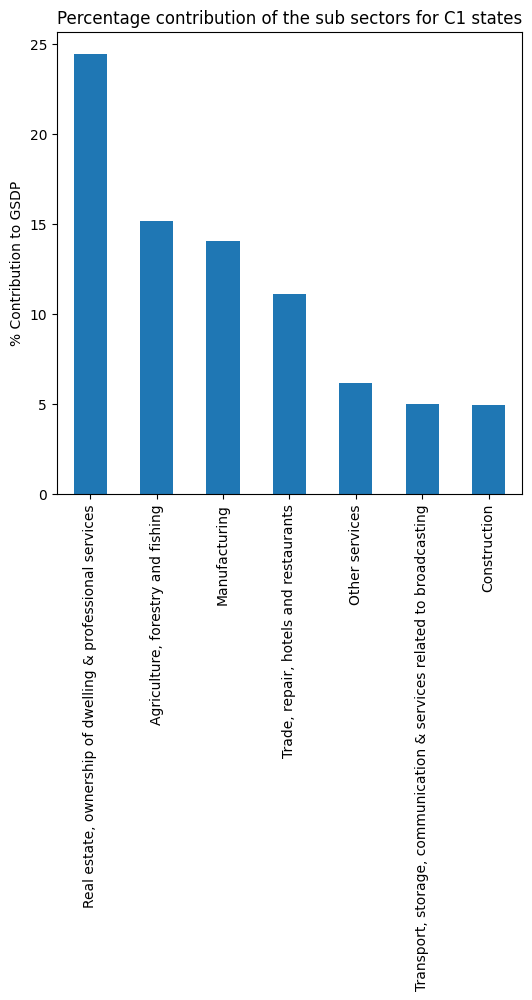

In [49]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C1 category states
df_state_C1['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C1 states')
plt.show()

#### The top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of C1 category.
1. Real estate, ownership of dwelling & professional services
2. Agriculture, forestry and fishing
3. Trade, repair, hotels and restaurants
4. Manufacturing

#### Sub-sectors need to be focused on as they contribute lesser on the 80% total GSDP
1. Other services
2. Transport, storage, communication & services related to broadcasting
3. Construction

# C2 states

In [50]:
# Creating dataframe for C2 states
# Taking only sub sectors columns and total GSDP
df_state_C2 = df_GSVA[df_GSVA['Category']=='C2']
df_state_C2 = df_state_C2[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C2

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
20,Punjab,15237453,14241.00,9299844,1838101,3628138,5285231,3151463,2545936,5034051,3093048,5747907,61422676
0,Andhra Pradesh,38845328,2770752.00,11152836,3284859,7183889,7203743,8360105,4727354,8627423,3810876,8051485,113383650
17,Mizoram,624568,14745.00,13291,535043,257045,307271,88934,50730,75175,343677,392913,2782350
1,Arunachal Pradesh,1242237,66688.00,25718,417693,243122,104217,79221,31527,59915,543532,523238,3512354
27,Uttarakhand,2721108,221841.00,9272668,891286,2132804,3538801,1759970,865761,1326195,1102282,1930232,27215948
8,Himachal Pradesh,2186611,40622.00,5198810,938292,1031480,1472103,847105,498226,1776370,922609,1732007,17626947
14,Maharashtra,37609676,6151730.00,44734121,7321336,17683056,26305265,12885415,28097441,63854266,11157811,21143367,310802187
12,Kerala,8983728,235910.00,7718555,1402847,11285728,15019354,5807897,3950651,13960784,3418900,11031793,93246996
23,Tamil Nadu,25215773,634051.00,37816644,3652659,22783255,21053827,10820006,10284484,34688513,5425816,19148348,207128616
6,Gujarat,27144843,5684700.00,63112285,5078575,10171380,20021264,9248704,8696299,10127760,4906447,6168028,193706646


In [51]:
# Transposing 'df_state_C2'
df_state_C2 = df_state_C2.T
df_state_C2

,20,0,17,1,27,8,14,12,23,6
State,Punjab,Andhra Pradesh,Mizoram,Arunachal Pradesh,Uttarakhand,Himachal Pradesh,Maharashtra,Kerala,Tamil Nadu,Gujarat
"Agriculture, forestry and fishing",15237453,38845328,624568,1242237,2721108,2186611,37609676,8983728,25215773,27144843
Mining and quarrying,14241.00,2770752.00,14745.00,66688.00,221841.00,40622.00,6151730.00,235910.00,634051.00,5684700.00
Manufacturing,9299844,11152836,13291,25718,9272668,5198810,44734121,7718555,37816644,63112285
"Electricity, gas, water supply & other utility services",1838101,3284859,535043,417693,891286,938292,7321336,1402847,3652659,5078575
Construction,3628138,7183889,257045,243122,2132804,1031480,17683056,11285728,22783255,10171380
"Trade, repair, hotels and restaurants",5285231,7203743,307271,104217,3538801,1472103,26305265,15019354,21053827,20021264
"Transport, storage, communication & services related to broadcasting",3151463,8360105,88934,79221,1759970,847105,12885415,5807897,10820006,9248704
Financial services,2545936,4727354,50730,31527,865761,498226,28097441,3950651,10284484,8696299
"Real estate, ownership of dwelling & professional services",5034051,8627423,75175,59915,1326195,1776370,63854266,13960784,34688513,10127760


In [52]:
# Creating column header with States name
header = df_state_C2.iloc[0]
df_state_C2 = df_state_C2[1:]
df_state_C2.columns = header
df_state_C2

State,Punjab,Andhra Pradesh,Mizoram,Arunachal Pradesh,Uttarakhand,Himachal Pradesh,Maharashtra,Kerala,Tamil Nadu,Gujarat
"Agriculture, forestry and fishing",15237453,38845328,624568,1242237,2721108,2186611,37609676,8983728,25215773,27144843
Mining and quarrying,14241.00,2770752.00,14745.00,66688.00,221841.00,40622.00,6151730.00,235910.00,634051.00,5684700.00
Manufacturing,9299844,11152836,13291,25718,9272668,5198810,44734121,7718555,37816644,63112285
"Electricity, gas, water supply & other utility services",1838101,3284859,535043,417693,891286,938292,7321336,1402847,3652659,5078575
Construction,3628138,7183889,257045,243122,2132804,1031480,17683056,11285728,22783255,10171380
"Trade, repair, hotels and restaurants",5285231,7203743,307271,104217,3538801,1472103,26305265,15019354,21053827,20021264
"Transport, storage, communication & services related to broadcasting",3151463,8360105,88934,79221,1759970,847105,12885415,5807897,10820006,9248704
Financial services,2545936,4727354,50730,31527,865761,498226,28097441,3950651,10284484,8696299
"Real estate, ownership of dwelling & professional services",5034051,8627423,75175,59915,1326195,1776370,63854266,13960784,34688513,10127760
Public administration,3093048,3810876,343677,543532,1102282,922609,11157811,3418900,5425816,4906447


In [53]:
print(df_state_C2.columns)

Index(['Punjab', 'Andhra Pradesh', 'Mizoram', 'Arunachal Pradesh',
       'Uttarakhand', 'Himachal Pradesh', 'Maharashtra', 'Kerala',
       'Tamil Nadu', 'Gujarat'],
      dtype='object', name='State')


In [54]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C2['Total'] = df_state_C2['Punjab'] + df_state_C2['Andhra Pradesh'] + df_state_C2['Mizoram'] + df_state_C2['Arunachal Pradesh'] + df_state_C2['Uttarakhand'] + df_state_C2['Himachal Pradesh'] + df_state_C2['Maharashtra'] + df_state_C2['Kerala'] + df_state_C2['Tamil Nadu'] + df_state_C2['Gujarat']
df_state_C2

State,Punjab,Andhra Pradesh,Mizoram,Arunachal Pradesh,Uttarakhand,Himachal Pradesh,Maharashtra,Kerala,Tamil Nadu,Gujarat,Total
"Agriculture, forestry and fishing",15237453,38845328,624568,1242237,2721108,2186611,37609676,8983728,25215773,27144843,159811325
Mining and quarrying,14241.00,2770752.00,14745.00,66688.00,221841.00,40622.00,6151730.00,235910.00,634051.00,5684700.00,15835280.00
Manufacturing,9299844,11152836,13291,25718,9272668,5198810,44734121,7718555,37816644,63112285,188344772
"Electricity, gas, water supply & other utility services",1838101,3284859,535043,417693,891286,938292,7321336,1402847,3652659,5078575,25360691
Construction,3628138,7183889,257045,243122,2132804,1031480,17683056,11285728,22783255,10171380,76399897
"Trade, repair, hotels and restaurants",5285231,7203743,307271,104217,3538801,1472103,26305265,15019354,21053827,20021264,100311076
"Transport, storage, communication & services related to broadcasting",3151463,8360105,88934,79221,1759970,847105,12885415,5807897,10820006,9248704,53048820
Financial services,2545936,4727354,50730,31527,865761,498226,28097441,3950651,10284484,8696299,59748409
"Real estate, ownership of dwelling & professional services",5034051,8627423,75175,59915,1326195,1776370,63854266,13960784,34688513,10127760,139530452
Public administration,3093048,3810876,343677,543532,1102282,922609,11157811,3418900,5425816,4906447,34724998


In [55]:
# Converting all the columns data type to numeric
df_state_C2[df_state_C2.columns] = df_state_C2[df_state_C2.columns].apply(pd.to_numeric)

In [56]:
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP 
df_state_C2['% Sub Sector Contribution'] = round(((df_state_C2['Total']/df_state_C2.at['Gross State Domestic Product','Total'])*100),2)
df_state_C2

State,Punjab,Andhra Pradesh,Mizoram,Arunachal Pradesh,Uttarakhand,Himachal Pradesh,Maharashtra,Kerala,Tamil Nadu,Gujarat,Total,% Sub Sector Contribution
"Agriculture, forestry and fishing",15237453,38845328,624568,1242237,2721108,2186611,37609676,8983728,25215773,27144843,159811325,15.50
Mining and quarrying,14241,2770752,14745,66688,221841,40622,6151730,235910,634051,5684700,15835280,1.54
Manufacturing,9299844,11152836,13291,25718,9272668,5198810,44734121,7718555,37816644,63112285,188344772,18.27
"Electricity, gas, water supply & other utility services",1838101,3284859,535043,417693,891286,938292,7321336,1402847,3652659,5078575,25360691,2.46
Construction,3628138,7183889,257045,243122,2132804,1031480,17683056,11285728,22783255,10171380,76399897,7.41
"Trade, repair, hotels and restaurants",5285231,7203743,307271,104217,3538801,1472103,26305265,15019354,21053827,20021264,100311076,9.73
"Transport, storage, communication & services related to broadcasting",3151463,8360105,88934,79221,1759970,847105,12885415,5807897,10820006,9248704,53048820,5.15
Financial services,2545936,4727354,50730,31527,865761,498226,28097441,3950651,10284484,8696299,59748409,5.80
"Real estate, ownership of dwelling & professional services",5034051,8627423,75175,59915,1326195,1776370,63854266,13960784,34688513,10127760,139530452,13.54
Public administration,3093048,3810876,343677,543532,1102282,922609,11157811,3418900,5425816,4906447,34724998,3.37


In [57]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C2 = df_state_C2.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C2 = df_state_C2.drop('Gross State Domestic Product')
df_state_C2

State,Punjab,Andhra Pradesh,Mizoram,Arunachal Pradesh,Uttarakhand,Himachal Pradesh,Maharashtra,Kerala,Tamil Nadu,Gujarat,Total,% Sub Sector Contribution
Manufacturing,9299844,11152836,13291,25718,9272668,5198810,44734121,7718555,37816644,63112285,188344772,18.27
"Agriculture, forestry and fishing",15237453,38845328,624568,1242237,2721108,2186611,37609676,8983728,25215773,27144843,159811325,15.50
"Real estate, ownership of dwelling & professional services",5034051,8627423,75175,59915,1326195,1776370,63854266,13960784,34688513,10127760,139530452,13.54
"Trade, repair, hotels and restaurants",5285231,7203743,307271,104217,3538801,1472103,26305265,15019354,21053827,20021264,100311076,9.73
Construction,3628138,7183889,257045,243122,2132804,1031480,17683056,11285728,22783255,10171380,76399897,7.41
Other services,5747907,8051485,392913,523238,1930232,1732007,21143367,11031793,19148348,6168028,75869318,7.36
Financial services,2545936,4727354,50730,31527,865761,498226,28097441,3950651,10284484,8696299,59748409,5.80
"Transport, storage, communication & services related to broadcasting",3151463,8360105,88934,79221,1759970,847105,12885415,5807897,10820006,9248704,53048820,5.15
Public administration,3093048,3810876,343677,543532,1102282,922609,11157811,3418900,5425816,4906447,34724998,3.37
"Electricity, gas, water supply & other utility services",1838101,3284859,535043,417693,891286,938292,7321336,1402847,3652659,5078575,25360691,2.46


In [58]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C2['Top 80%'] = df_state_C2['% Sub Sector Contribution'].cumsum()
df_state_C2

State,Punjab,Andhra Pradesh,Mizoram,Arunachal Pradesh,Uttarakhand,Himachal Pradesh,Maharashtra,Kerala,Tamil Nadu,Gujarat,Total,% Sub Sector Contribution,Top 80%
Manufacturing,9299844,11152836,13291,25718,9272668,5198810,44734121,7718555,37816644,63112285,188344772,18.27,18.27
"Agriculture, forestry and fishing",15237453,38845328,624568,1242237,2721108,2186611,37609676,8983728,25215773,27144843,159811325,15.50,33.77
"Real estate, ownership of dwelling & professional services",5034051,8627423,75175,59915,1326195,1776370,63854266,13960784,34688513,10127760,139530452,13.54,47.31
"Trade, repair, hotels and restaurants",5285231,7203743,307271,104217,3538801,1472103,26305265,15019354,21053827,20021264,100311076,9.73,57.04
Construction,3628138,7183889,257045,243122,2132804,1031480,17683056,11285728,22783255,10171380,76399897,7.41,64.45
Other services,5747907,8051485,392913,523238,1930232,1732007,21143367,11031793,19148348,6168028,75869318,7.36,71.81
Financial services,2545936,4727354,50730,31527,865761,498226,28097441,3950651,10284484,8696299,59748409,5.80,77.61
"Transport, storage, communication & services related to broadcasting",3151463,8360105,88934,79221,1759970,847105,12885415,5807897,10820006,9248704,53048820,5.15,82.76
Public administration,3093048,3810876,343677,543532,1102282,922609,11157811,3418900,5425816,4906447,34724998,3.37,86.13
"Electricity, gas, water supply & other utility services",1838101,3284859,535043,417693,891286,938292,7321336,1402847,3652659,5078575,25360691,2.46,88.59


In [59]:
# Filtering the sub sectors, which contribute more than 80%
df_state_C2 = df_state_C2[df_state_C2['Top 80%'] < 80]
df_state_C2

State,Punjab,Andhra Pradesh,Mizoram,Arunachal Pradesh,Uttarakhand,Himachal Pradesh,Maharashtra,Kerala,Tamil Nadu,Gujarat,Total,% Sub Sector Contribution,Top 80%
Manufacturing,9299844,11152836,13291,25718,9272668,5198810,44734121,7718555,37816644,63112285,188344772,18.27,18.27
"Agriculture, forestry and fishing",15237453,38845328,624568,1242237,2721108,2186611,37609676,8983728,25215773,27144843,159811325,15.50,33.77
"Real estate, ownership of dwelling & professional services",5034051,8627423,75175,59915,1326195,1776370,63854266,13960784,34688513,10127760,139530452,13.54,47.31
"Trade, repair, hotels and restaurants",5285231,7203743,307271,104217,3538801,1472103,26305265,15019354,21053827,20021264,100311076,9.73,57.04
Construction,3628138,7183889,257045,243122,2132804,1031480,17683056,11285728,22783255,10171380,76399897,7.41,64.45
Other services,5747907,8051485,392913,523238,1930232,1732007,21143367,11031793,19148348,6168028,75869318,7.36,71.81
Financial services,2545936,4727354,50730,31527,865761,498226,28097441,3950651,10284484,8696299,59748409,5.80,77.61


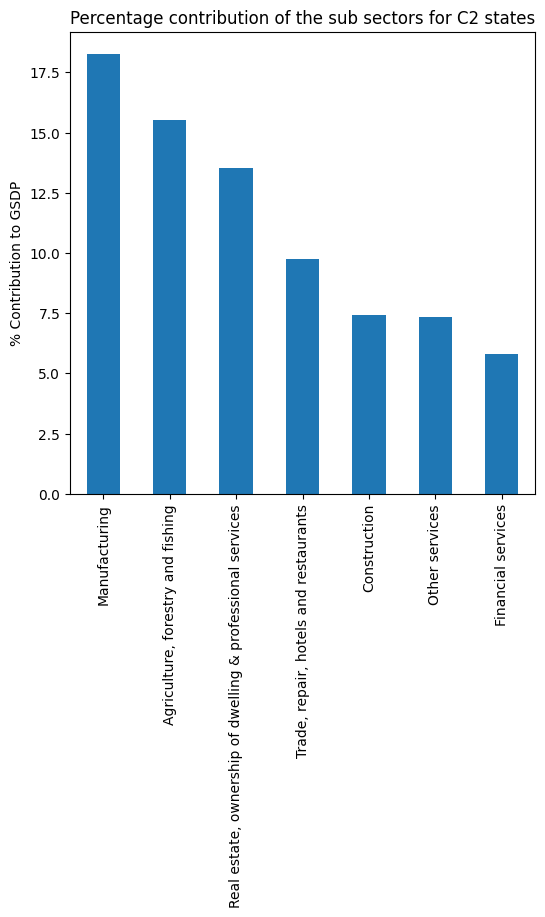

In [60]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C2 category states
df_state_C2['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C2 states')
plt.show()

#### The top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of C2 category.
1. Manufacturing
2. Real estate, ownership of dwelling & professional services
3. Agriculture, forestry and fishing
4. Trade, repair, hotels and restaurants

#### Sub-sectors need to be focused on as they contribute lesser on the 80% total GSDP
1. Construction
2. Other services
3. Finacial Services

# C3 states

In [61]:
# Creating dataframe for C3 states
# Taking only sub sectors columns and total GSDP
df_state_C3 = df_GSVA[df_GSVA['Category']=='C3']
df_state_C3 = df_state_C3[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C3

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
13,Madhya Pradesh,47619891,3385343.00,8998570,3630408,7925909,9533222,5025799,3618964,5099872,5201466,6576567,113613719
4,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,1892415,3024425,40641582
28,West Bengal,27404777,1106960.00,17310596,2361288,10363809,20688095,7279007,5818345,18915594,7000881,11696504,136392586
18,Nagaland,768735,23927.00,31846,64568,248480,251916,140867,205994,189219,616176,518601,3191254
19,Odisha,12862334,6388455.00,13208016,1917431,4148108,4493314,3699892,1884015,3309749,2818988,4584933,67088123
9,Jammu & Kashmir,3175760,53172.00,1627886,940064,1307008,1669857,1300805,566761,2058005,3863470,1739308,19991742
21,Rajasthan,33331324,4049240.00,13081670,3927817,10069591,12530014,5518568,4645809,12363873,3711605,10181948,121819345
25,Tripura,2098552,571041.00,199471,201223,274221,574537,258052,161349,308444,679178,687381,6255044


In [62]:
# Transposing 'df_state_C3'
df_state_C3 = df_state_C3.T
df_state_C3

,13,4,28,18,19,9,21,25
State,Madhya Pradesh,Chhattisgarh,West Bengal,Nagaland,Odisha,Jammu & Kashmir,Rajasthan,Tripura
"Agriculture, forestry and fishing",47619891,8549180,27404777,768735,12862334,3175760,33331324,2098552
Mining and quarrying,3385343.00,3448714.00,1106960.00,23927.00,6388455.00,53172.00,4049240.00,571041.00
Manufacturing,8998570,5512457,17310596,31846,13208016,1627886,13081670,199471
"Electricity, gas, water supply & other utility services",3630408,2855175,2361288,64568,1917431,940064,3927817,201223
Construction,7925909,4545221,10363809,248480,4148108,1307008,10069591,274221
"Trade, repair, hotels and restaurants",9533222,2645376,20688095,251916,4493314,1669857,12530014,574537
"Transport, storage, communication & services related to broadcasting",5025799,1580274,7279007,140867,3699892,1300805,5518568,258052
Financial services,3618964,1207958,5818345,205994,1884015,566761,4645809,161349
"Real estate, ownership of dwelling & professional services",5099872,3282452,18915594,189219,3309749,2058005,12363873,308444


In [63]:
# Creating column header with States name
header = df_state_C3.iloc[0]
df_state_C3 = df_state_C3[1:]
df_state_C3.columns = header
df_state_C3

State,Madhya Pradesh,Chhattisgarh,West Bengal,Nagaland,Odisha,Jammu & Kashmir,Rajasthan,Tripura
"Agriculture, forestry and fishing",47619891,8549180,27404777,768735,12862334,3175760,33331324,2098552
Mining and quarrying,3385343.00,3448714.00,1106960.00,23927.00,6388455.00,53172.00,4049240.00,571041.00
Manufacturing,8998570,5512457,17310596,31846,13208016,1627886,13081670,199471
"Electricity, gas, water supply & other utility services",3630408,2855175,2361288,64568,1917431,940064,3927817,201223
Construction,7925909,4545221,10363809,248480,4148108,1307008,10069591,274221
"Trade, repair, hotels and restaurants",9533222,2645376,20688095,251916,4493314,1669857,12530014,574537
"Transport, storage, communication & services related to broadcasting",5025799,1580274,7279007,140867,3699892,1300805,5518568,258052
Financial services,3618964,1207958,5818345,205994,1884015,566761,4645809,161349
"Real estate, ownership of dwelling & professional services",5099872,3282452,18915594,189219,3309749,2058005,12363873,308444
Public administration,5201466,1892415,7000881,616176,2818988,3863470,3711605,679178


In [64]:
print(df_state_C3.columns)

Index(['Madhya Pradesh', 'Chhattisgarh', 'West Bengal', 'Nagaland', 'Odisha',
       'Jammu & Kashmir', 'Rajasthan', 'Tripura'],
      dtype='object', name='State')


In [65]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C3['Total'] = df_state_C3['Madhya Pradesh']+df_state_C3['Chhattisgarh']+df_state_C3['West Bengal']+df_state_C3['Nagaland']+df_state_C3['Odisha']+df_state_C3['Jammu & Kashmir']+df_state_C3['Rajasthan']+df_state_C3['Tripura']
df_state_C3

State,Madhya Pradesh,Chhattisgarh,West Bengal,Nagaland,Odisha,Jammu & Kashmir,Rajasthan,Tripura,Total
"Agriculture, forestry and fishing",47619891,8549180,27404777,768735,12862334,3175760,33331324,2098552,135810553
Mining and quarrying,3385343.00,3448714.00,1106960.00,23927.00,6388455.00,53172.00,4049240.00,571041.00,19026852.00
Manufacturing,8998570,5512457,17310596,31846,13208016,1627886,13081670,199471,59970512
"Electricity, gas, water supply & other utility services",3630408,2855175,2361288,64568,1917431,940064,3927817,201223,15897974
Construction,7925909,4545221,10363809,248480,4148108,1307008,10069591,274221,38882347
"Trade, repair, hotels and restaurants",9533222,2645376,20688095,251916,4493314,1669857,12530014,574537,52386331
"Transport, storage, communication & services related to broadcasting",5025799,1580274,7279007,140867,3699892,1300805,5518568,258052,24803264
Financial services,3618964,1207958,5818345,205994,1884015,566761,4645809,161349,18109195
"Real estate, ownership of dwelling & professional services",5099872,3282452,18915594,189219,3309749,2058005,12363873,308444,45527208
Public administration,5201466,1892415,7000881,616176,2818988,3863470,3711605,679178,25784179


In [66]:
# Converting all the columns data type to numeric
df_state_C3[df_state_C3.columns] = df_state_C3[df_state_C3.columns].apply(pd.to_numeric)

In [67]:
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP 
df_state_C3['% Sub Sector Contribution'] = round(((df_state_C3['Total']/df_state_C3.at['Gross State Domestic Product','Total'])*100),2)
df_state_C3

State,Madhya Pradesh,Chhattisgarh,West Bengal,Nagaland,Odisha,Jammu & Kashmir,Rajasthan,Tripura,Total,% Sub Sector Contribution
"Agriculture, forestry and fishing",47619891,8549180,27404777,768735,12862334,3175760,33331324,2098552,135810553,26.68
Mining and quarrying,3385343,3448714,1106960,23927,6388455,53172,4049240,571041,19026852,3.74
Manufacturing,8998570,5512457,17310596,31846,13208016,1627886,13081670,199471,59970512,11.78
"Electricity, gas, water supply & other utility services",3630408,2855175,2361288,64568,1917431,940064,3927817,201223,15897974,3.12
Construction,7925909,4545221,10363809,248480,4148108,1307008,10069591,274221,38882347,7.64
"Trade, repair, hotels and restaurants",9533222,2645376,20688095,251916,4493314,1669857,12530014,574537,52386331,10.29
"Transport, storage, communication & services related to broadcasting",5025799,1580274,7279007,140867,3699892,1300805,5518568,258052,24803264,4.87
Financial services,3618964,1207958,5818345,205994,1884015,566761,4645809,161349,18109195,3.56
"Real estate, ownership of dwelling & professional services",5099872,3282452,18915594,189219,3309749,2058005,12363873,308444,45527208,8.94
Public administration,5201466,1892415,7000881,616176,2818988,3863470,3711605,679178,25784179,5.07


In [68]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C3 = df_state_C3.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C3 = df_state_C3.drop('Gross State Domestic Product')
df_state_C3

State,Madhya Pradesh,Chhattisgarh,West Bengal,Nagaland,Odisha,Jammu & Kashmir,Rajasthan,Tripura,Total,% Sub Sector Contribution
"Agriculture, forestry and fishing",47619891,8549180,27404777,768735,12862334,3175760,33331324,2098552,135810553,26.68
Manufacturing,8998570,5512457,17310596,31846,13208016,1627886,13081670,199471,59970512,11.78
"Trade, repair, hotels and restaurants",9533222,2645376,20688095,251916,4493314,1669857,12530014,574537,52386331,10.29
"Real estate, ownership of dwelling & professional services",5099872,3282452,18915594,189219,3309749,2058005,12363873,308444,45527208,8.94
Other services,6576567,3024425,11696504,518601,4584933,1739308,10181948,687381,39009667,7.66
Construction,7925909,4545221,10363809,248480,4148108,1307008,10069591,274221,38882347,7.64
Public administration,5201466,1892415,7000881,616176,2818988,3863470,3711605,679178,25784179,5.07
"Transport, storage, communication & services related to broadcasting",5025799,1580274,7279007,140867,3699892,1300805,5518568,258052,24803264,4.87
Mining and quarrying,3385343,3448714,1106960,23927,6388455,53172,4049240,571041,19026852,3.74
Financial services,3618964,1207958,5818345,205994,1884015,566761,4645809,161349,18109195,3.56


In [69]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C3['Top 80%'] = df_state_C3['% Sub Sector Contribution'].cumsum()
df_state_C3

State,Madhya Pradesh,Chhattisgarh,West Bengal,Nagaland,Odisha,Jammu & Kashmir,Rajasthan,Tripura,Total,% Sub Sector Contribution,Top 80%
"Agriculture, forestry and fishing",47619891,8549180,27404777,768735,12862334,3175760,33331324,2098552,135810553,26.68,26.68
Manufacturing,8998570,5512457,17310596,31846,13208016,1627886,13081670,199471,59970512,11.78,38.46
"Trade, repair, hotels and restaurants",9533222,2645376,20688095,251916,4493314,1669857,12530014,574537,52386331,10.29,48.75
"Real estate, ownership of dwelling & professional services",5099872,3282452,18915594,189219,3309749,2058005,12363873,308444,45527208,8.94,57.69
Other services,6576567,3024425,11696504,518601,4584933,1739308,10181948,687381,39009667,7.66,65.35
Construction,7925909,4545221,10363809,248480,4148108,1307008,10069591,274221,38882347,7.64,72.99
Public administration,5201466,1892415,7000881,616176,2818988,3863470,3711605,679178,25784179,5.07,78.06
"Transport, storage, communication & services related to broadcasting",5025799,1580274,7279007,140867,3699892,1300805,5518568,258052,24803264,4.87,82.93
Mining and quarrying,3385343,3448714,1106960,23927,6388455,53172,4049240,571041,19026852,3.74,86.67
Financial services,3618964,1207958,5818345,205994,1884015,566761,4645809,161349,18109195,3.56,90.23


In [70]:
# Filtering the sub sectors, which contribute more than 80%
df_state_C3 = df_state_C3[df_state_C3['Top 80%'] < 80]
df_state_C3

State,Madhya Pradesh,Chhattisgarh,West Bengal,Nagaland,Odisha,Jammu & Kashmir,Rajasthan,Tripura,Total,% Sub Sector Contribution,Top 80%
"Agriculture, forestry and fishing",47619891,8549180,27404777,768735,12862334,3175760,33331324,2098552,135810553,26.68,26.68
Manufacturing,8998570,5512457,17310596,31846,13208016,1627886,13081670,199471,59970512,11.78,38.46
"Trade, repair, hotels and restaurants",9533222,2645376,20688095,251916,4493314,1669857,12530014,574537,52386331,10.29,48.75
"Real estate, ownership of dwelling & professional services",5099872,3282452,18915594,189219,3309749,2058005,12363873,308444,45527208,8.94,57.69
Other services,6576567,3024425,11696504,518601,4584933,1739308,10181948,687381,39009667,7.66,65.35
Construction,7925909,4545221,10363809,248480,4148108,1307008,10069591,274221,38882347,7.64,72.99
Public administration,5201466,1892415,7000881,616176,2818988,3863470,3711605,679178,25784179,5.07,78.06


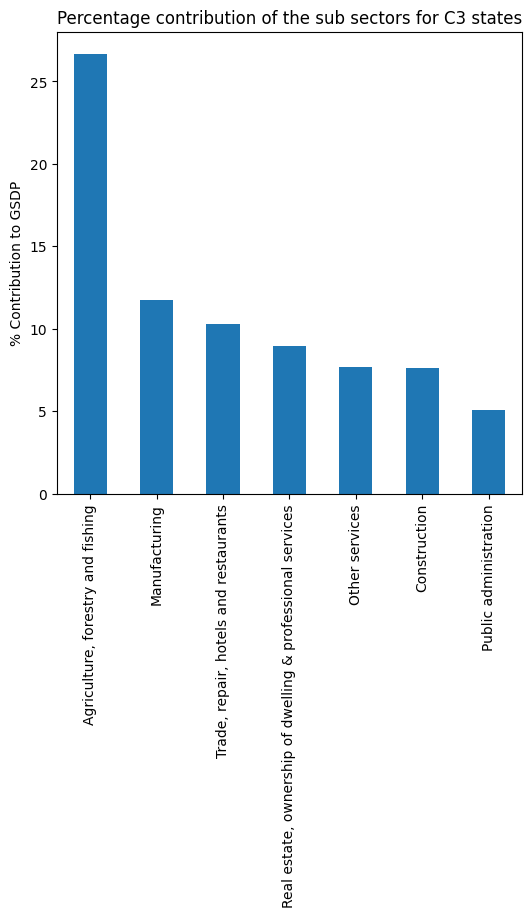

In [71]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C3 category states
df_state_C3['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C3 states')
plt.show()

#### The top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of C3 category.
1. Agriculture, forestry and fishing
2. Manufacturing
3. Trade, repair, hotels and restaurants
4. Real estate, ownership of dwelling & professional services

#### Sub-sectors need to be focused on as they contribute lesser on the 80% total GSDP
1. Public administration
2. Other services
3. Construction

# C4 states

In [72]:
# Creating dataframe for C4 states
# Taking only sub sectors columns and total GSDP
df_state_C4 = df_GSVA[df_GSVA['Category']=='C4']
df_state_C4 = df_state_C4[['State','Agriculture, forestry and fishing','Mining and quarrying','Manufacturing','Electricity, gas, water supply & other utility services',
                          'Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services',
                          'Public administration','Other services','Gross State Domestic Product']]
df_state_C4

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
3,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,3577942,9259093,65030243
26,Uttar Pradesh,46761959,1559407.00,22432199,5562812,20839861,14871994,13933630,6255925,25928712,12259664,10323460,197453155
10,Jharkhand,6078269,2049263.00,6945527,717537,3020358,3888157,2591025,937597,2792276,2034972,2266632,35886259
15,Manipur,923521,NaN,55589,66004,170733,379953,214714,77131,209220,650960,703468,3659447
16,Meghalaya,792416,52725.00,322865,83025,236992,753878,249131,97914,189371,477084,410449,3878470
2,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,2376880,3879171,41261187


In [73]:
# Transposing 'df_state_C4'
df_state_C4 = df_state_C4.T
df_state_C4

,3,26,10,15,16,2
State,Bihar,Uttar Pradesh,Jharkhand,Manipur,Meghalaya,Assam
"Agriculture, forestry and fishing",15974145,46761959,6078269,923521,792416,9050750
Mining and quarrying,97927.00,1559407.00,2049263.00,NaN,52725.00,3789580.00
Manufacturing,5015762,22432199,6945527,55589,322865,4701439
"Electricity, gas, water supply & other utility services",965776,5562812,717537,66004,83025,790862
Construction,5589218,20839861,3020358,170733,236992,2289199
"Trade, repair, hotels and restaurants",9372318,14871994,3888157,379953,753878,4816498
"Transport, storage, communication & services related to broadcasting",6871314,13933630,2591025,214714,249131,2599781
Financial services,2627557,6255925,937597,77131,97914,1233770
"Real estate, ownership of dwelling & professional services",4881912,25928712,2792276,209220,189371,1975468


In [74]:
# Creating column header with States name
header = df_state_C4.iloc[0]
df_state_C4 = df_state_C4[1:]
df_state_C4.columns = header
df_state_C4

State,Bihar,Uttar Pradesh,Jharkhand,Manipur,Meghalaya,Assam
"Agriculture, forestry and fishing",15974145,46761959,6078269,923521,792416,9050750
Mining and quarrying,97927.00,1559407.00,2049263.00,NaN,52725.00,3789580.00
Manufacturing,5015762,22432199,6945527,55589,322865,4701439
"Electricity, gas, water supply & other utility services",965776,5562812,717537,66004,83025,790862
Construction,5589218,20839861,3020358,170733,236992,2289199
"Trade, repair, hotels and restaurants",9372318,14871994,3888157,379953,753878,4816498
"Transport, storage, communication & services related to broadcasting",6871314,13933630,2591025,214714,249131,2599781
Financial services,2627557,6255925,937597,77131,97914,1233770
"Real estate, ownership of dwelling & professional services",4881912,25928712,2792276,209220,189371,1975468
Public administration,3577942,12259664,2034972,650960,477084,2376880


In [75]:
# Summing up all the states sub sectors contribution and GSDP in 'Total' column
df_state_C4['Total'] = df_state_C4['Bihar']+df_state_C4['Uttar Pradesh']+df_state_C4['Jharkhand']+df_state_C4['Manipur']+df_state_C4['Meghalaya']+df_state_C4['Assam']
df_state_C4

State,Bihar,Uttar Pradesh,Jharkhand,Manipur,Meghalaya,Assam,Total
"Agriculture, forestry and fishing",15974145,46761959,6078269,923521,792416,9050750,79581060
Mining and quarrying,97927.00,1559407.00,2049263.00,NaN,52725.00,3789580.00,NaN
Manufacturing,5015762,22432199,6945527,55589,322865,4701439,39473381
"Electricity, gas, water supply & other utility services",965776,5562812,717537,66004,83025,790862,8186016
Construction,5589218,20839861,3020358,170733,236992,2289199,32146361
"Trade, repair, hotels and restaurants",9372318,14871994,3888157,379953,753878,4816498,34082798
"Transport, storage, communication & services related to broadcasting",6871314,13933630,2591025,214714,249131,2599781,26459595
Financial services,2627557,6255925,937597,77131,97914,1233770,11229894
"Real estate, ownership of dwelling & professional services",4881912,25928712,2792276,209220,189371,1975468,35976959
Public administration,3577942,12259664,2034972,650960,477084,2376880,21377502


In [76]:
# Converting all the columns data type to numeric
df_state_C4[df_state_C4.columns] = df_state_C4[df_state_C4.columns].apply(pd.to_numeric)

In [77]:
# Creating '% Sub Sector Contribution' column
# By dividing Total sub sector contribution / Total GSDP 
df_state_C4['% Sub Sector Contribution'] = round(((df_state_C4['Total']/df_state_C4.at['Gross State Domestic Product','Total'])*100),2)
df_state_C4

State,Bihar,Uttar Pradesh,Jharkhand,Manipur,Meghalaya,Assam,Total,% Sub Sector Contribution
"Agriculture, forestry and fishing",15974145,46761959,6078269,923521.00,792416,9050750,79581060.00,22.92
Mining and quarrying,97927,1559407,2049263,NaN,52725,3789580,NaN,NaN
Manufacturing,5015762,22432199,6945527,55589.00,322865,4701439,39473381.00,11.37
"Electricity, gas, water supply & other utility services",965776,5562812,717537,66004.00,83025,790862,8186016.00,2.36
Construction,5589218,20839861,3020358,170733.00,236992,2289199,32146361.00,9.26
"Trade, repair, hotels and restaurants",9372318,14871994,3888157,379953.00,753878,4816498,34082798.00,9.82
"Transport, storage, communication & services related to broadcasting",6871314,13933630,2591025,214714.00,249131,2599781,26459595.00,7.62
Financial services,2627557,6255925,937597,77131.00,97914,1233770,11229894.00,3.23
"Real estate, ownership of dwelling & professional services",4881912,25928712,2792276,209220.00,189371,1975468,35976959.00,10.36
Public administration,3577942,12259664,2034972,650960.00,477084,2376880,21377502.00,6.16


In [78]:
# Sorting the dataframe by '% Sub Sector Contribution'
# Dropping 'Gross State Domestic Product' column
df_state_C4 = df_state_C4.sort_values(by='% Sub Sector Contribution',ascending=False)
df_state_C4 = df_state_C4.drop('Gross State Domestic Product')
df_state_C4

State,Bihar,Uttar Pradesh,Jharkhand,Manipur,Meghalaya,Assam,Total,% Sub Sector Contribution
"Agriculture, forestry and fishing",15974145,46761959,6078269,923521.00,792416,9050750,79581060.00,22.92
Manufacturing,5015762,22432199,6945527,55589.00,322865,4701439,39473381.00,11.37
"Real estate, ownership of dwelling & professional services",4881912,25928712,2792276,209220.00,189371,1975468,35976959.00,10.36
"Trade, repair, hotels and restaurants",9372318,14871994,3888157,379953.00,753878,4816498,34082798.00,9.82
Construction,5589218,20839861,3020358,170733.00,236992,2289199,32146361.00,9.26
Other services,9259093,10323460,2266632,703468.00,410449,3879171,26842273.00,7.73
"Transport, storage, communication & services related to broadcasting",6871314,13933630,2591025,214714.00,249131,2599781,26459595.00,7.62
Public administration,3577942,12259664,2034972,650960.00,477084,2376880,21377502.00,6.16
Financial services,2627557,6255925,937597,77131.00,97914,1233770,11229894.00,3.23
"Electricity, gas, water supply & other utility services",965776,5562812,717537,66004.00,83025,790862,8186016.00,2.36


In [79]:
# Creating 'Top 80%' column
# By cumulative sum of 'Top 80%' column
df_state_C4['Top 80%'] = df_state_C4['% Sub Sector Contribution'].cumsum()
df_state_C4

State,Bihar,Uttar Pradesh,Jharkhand,Manipur,Meghalaya,Assam,Total,% Sub Sector Contribution,Top 80%
"Agriculture, forestry and fishing",15974145,46761959,6078269,923521.00,792416,9050750,79581060.00,22.92,22.92
Manufacturing,5015762,22432199,6945527,55589.00,322865,4701439,39473381.00,11.37,34.29
"Real estate, ownership of dwelling & professional services",4881912,25928712,2792276,209220.00,189371,1975468,35976959.00,10.36,44.65
"Trade, repair, hotels and restaurants",9372318,14871994,3888157,379953.00,753878,4816498,34082798.00,9.82,54.47
Construction,5589218,20839861,3020358,170733.00,236992,2289199,32146361.00,9.26,63.73
Other services,9259093,10323460,2266632,703468.00,410449,3879171,26842273.00,7.73,71.46
"Transport, storage, communication & services related to broadcasting",6871314,13933630,2591025,214714.00,249131,2599781,26459595.00,7.62,79.08
Public administration,3577942,12259664,2034972,650960.00,477084,2376880,21377502.00,6.16,85.24
Financial services,2627557,6255925,937597,77131.00,97914,1233770,11229894.00,3.23,88.47
"Electricity, gas, water supply & other utility services",965776,5562812,717537,66004.00,83025,790862,8186016.00,2.36,90.83


In [80]:
# Filtering the sub sectors, which contribute more than 80%
df_state_C4 = df_state_C4[df_state_C4['Top 80%'] < 81]
df_state_C4

State,Bihar,Uttar Pradesh,Jharkhand,Manipur,Meghalaya,Assam,Total,% Sub Sector Contribution,Top 80%
"Agriculture, forestry and fishing",15974145,46761959,6078269,923521.00,792416,9050750,79581060.00,22.92,22.92
Manufacturing,5015762,22432199,6945527,55589.00,322865,4701439,39473381.00,11.37,34.29
"Real estate, ownership of dwelling & professional services",4881912,25928712,2792276,209220.00,189371,1975468,35976959.00,10.36,44.65
"Trade, repair, hotels and restaurants",9372318,14871994,3888157,379953.00,753878,4816498,34082798.00,9.82,54.47
Construction,5589218,20839861,3020358,170733.00,236992,2289199,32146361.00,9.26,63.73
Other services,9259093,10323460,2266632,703468.00,410449,3879171,26842273.00,7.73,71.46
"Transport, storage, communication & services related to broadcasting",6871314,13933630,2591025,214714.00,249131,2599781,26459595.00,7.62,79.08


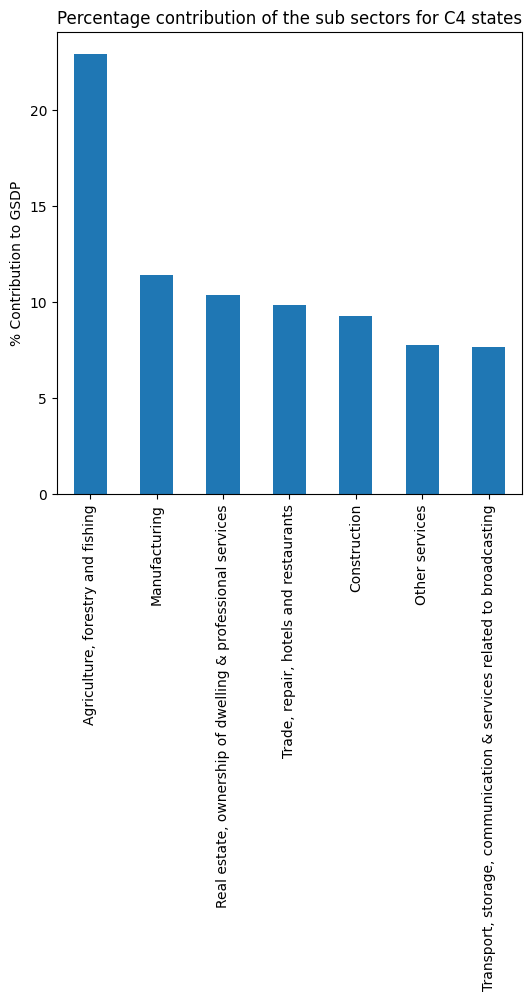

In [81]:
# Plot the contribution of the sub-sectors as a percentage of the GSDP for C4 category states
df_state_C4['% Sub Sector Contribution'].plot(kind='bar',figsize=(6,6))
plt.ylabel('% Contribution to GSDP')
plt.title('Percentage contribution of the sub sectors for C4 states')
plt.show()

#### The top 3/4/5 sub-sectors that contribute to approximately 80% of the GSDP of C4 category.
1. Agriculture, forestry and fishing
2. Trade, repair, hotels and restaurants
3. Manufacturing
4. Real estate, ownership of dwelling & professional services
5. Construction

#### Sub-sectors need to be focused on as they contribute lesser on the 80% total GSDP
1. Transport, storage, communication & services related to broadcasting
2. Other services

# Part-II: GDP and Education Dropout Rates as per 2021-22

In [82]:
# Reading DropOutRates file for 2021-2022
df_dropout_rate = pd.read_excel("C:/Users/Sushant/OneDrive/Desktop/theforage/Project/Python/Drop-Out Rates.xlsx")
df_dropout_rate

,State /UT,Primary 2021-22,Upper Primary 2021-22,Secondary 2021-22
0,Andaman and Nicobar Islands,0.40,1.00,5.00
1,Andhra Pradesh,0.00,1.60,16.30
2,Arunachal Pradesh,9.30,6.70,11.70
3,Assam,6.00,8.80,20.30
4,Bihar,0.00,4.60,20.50
5,Chandigarh,0.00,0.00,0.00
6,Chhattisgarh,0.80,4.10,9.70
7,Dadra and Nagar Haveli and Daman and Diu,0.00,0.00,9.50
8,Delhi,0.00,0.00,4.80
9,Goa,0.00,0.00,9.00


In [83]:
# Renaming 'Level of Education - State' column to 'State'
df_dropout_rate.rename(columns={'State /UT': 'State'}, inplace=True)

df_dropout_rate

,State,Primary 2021-22,Upper Primary 2021-22,Secondary 2021-22
0,Andaman and Nicobar Islands,0.40,1.00,5.00
1,Andhra Pradesh,0.00,1.60,16.30
2,Arunachal Pradesh,9.30,6.70,11.70
3,Assam,6.00,8.80,20.30
4,Bihar,0.00,4.60,20.50
5,Chandigarh,0.00,0.00,0.00
6,Chhattisgarh,0.80,4.10,9.70
7,Dadra and Nagar Haveli and Daman and Diu,0.00,0.00,9.50
8,Delhi,0.00,0.00,4.80
9,Goa,0.00,0.00,9.00


In [84]:
# Left merging df_GSVA_all_states and df_dropout_rate on 'State' key
df_GDP_and_education = pd.merge(df_GSVA,df_dropout_rate,how='left',on='State')
df_GDP_and_education

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution,Percentile Rank,Category,Primary 2021-22,Upper Primary 2021-22,Secondary 2021-22
0,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,...,1241540,52379,24.71,17.79,56.27,1.00,C4,0.00,4.60,20.50
1,Uttar Pradesh,46761959,1559407.00,22432199,5562812,20839861,14871994,13933630,6255925,25928712,...,2346750,84139,24.47,24.73,42.33,2.00,C4,2.70,2.90,9.70
2,Jharkhand,6078269,2049263.00,6945527,717537,3020358,3888157,2591025,937597,2792276,...,387620,92581,22.65,29.77,40.44,3.00,C4,1.80,3.90,9.30
3,Manipur,923521,NaN,55589,66004,170733,379953,214714,77131,209220,...,35905,101920,25.24,7.99,61.09,4.00,C4,13.30,5.60,1.30
4,Meghalaya,792416,52725.00,322865,83025,236992,753878,249131,97914,189371,...,33330,116366,21.79,16.58,56.15,5.00,C4,9.80,10.60,21.70
5,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,...,352702,116986,31.12,18.86,40.91,6.00,C4,6.00,8.80,20.30
6,Madhya Pradesh,47619891,3385343.00,8998570,3630408,7925909,9533222,5025799,3618964,5099872,...,851180,133478,44.89,18.09,30.86,7.00,C3,3.10,8.80,10.10
7,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,...,296930,136873,29.52,31.77,33.54,8.00,C3,0.80,4.10,9.70
8,West Bengal,27404777,1106960.00,17310596,2361288,10363809,20688095,7279007,5818345,18915594,...,984040,138605,20.90,22.02,52.35,9.00,C3,8.60,0.00,18.00
9,Nagaland,768735,23927.00,31846,64568,248480,251916,140867,205994,189219,...,22130,144205,24.84,10.81,60.25,10.00,C3,5.00,4.00,17.50


In [85]:
# Sorting by='Per Capita GSDP (Rs.)'
df_GDP_and_education = df_GDP_and_education.sort_values(by='Per Capita GSDP (Rs.)')
df_GDP_and_education

,State,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",...,Population,Per Capita GSDP (Rs.),% Primary contribution,% Secondary contribution,% Tertiary contribution,Percentile Rank,Category,Primary 2021-22,Upper Primary 2021-22,Secondary 2021-22
0,Bihar,15974145,97927.00,5015762,965776,5589218,9372318,6871314,2627557,4881912,...,1241540,52379,24.71,17.79,56.27,1.00,C4,0.00,4.60,20.50
1,Uttar Pradesh,46761959,1559407.00,22432199,5562812,20839861,14871994,13933630,6255925,25928712,...,2346750,84139,24.47,24.73,42.33,2.00,C4,2.70,2.90,9.70
2,Jharkhand,6078269,2049263.00,6945527,717537,3020358,3888157,2591025,937597,2792276,...,387620,92581,22.65,29.77,40.44,3.00,C4,1.80,3.90,9.30
3,Manipur,923521,NaN,55589,66004,170733,379953,214714,77131,209220,...,35905,101920,25.24,7.99,61.09,4.00,C4,13.30,5.60,1.30
4,Meghalaya,792416,52725.00,322865,83025,236992,753878,249131,97914,189371,...,33330,116366,21.79,16.58,56.15,5.00,C4,9.80,10.60,21.70
5,Assam,9050750,3789580.00,4701439,790862,2289199,4816498,2599781,1233770,1975468,...,352702,116986,31.12,18.86,40.91,6.00,C4,6.00,8.80,20.30
6,Madhya Pradesh,47619891,3385343.00,8998570,3630408,7925909,9533222,5025799,3618964,5099872,...,851180,133478,44.89,18.09,30.86,7.00,C3,3.10,8.80,10.10
7,Chhattisgarh,8549180,3448714.00,5512457,2855175,4545221,2645376,1580274,1207958,3282452,...,296930,136873,29.52,31.77,33.54,8.00,C3,0.80,4.10,9.70
8,West Bengal,27404777,1106960.00,17310596,2361288,10363809,20688095,7279007,5818345,18915594,...,984040,138605,20.90,22.02,52.35,9.00,C3,8.60,0.00,18.00
9,Nagaland,768735,23927.00,31846,64568,248480,251916,140867,205994,189219,...,22130,144205,24.84,10.81,60.25,10.00,C3,5.00,4.00,17.50


In [86]:
# Converting required columns to nemeric
col_list = ['Primary','Secondary','Tertiary','Population','Per Capita GSDP (Rs.)','Primary 2021-22','Upper Primary 2021-22','Secondary 2021-22']
df_GDP_and_education[col_list] = df_GDP_and_education[col_list].apply(pd.to_numeric)

#### Sactter plot for GDP per capita with `Primary` dropout rates

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


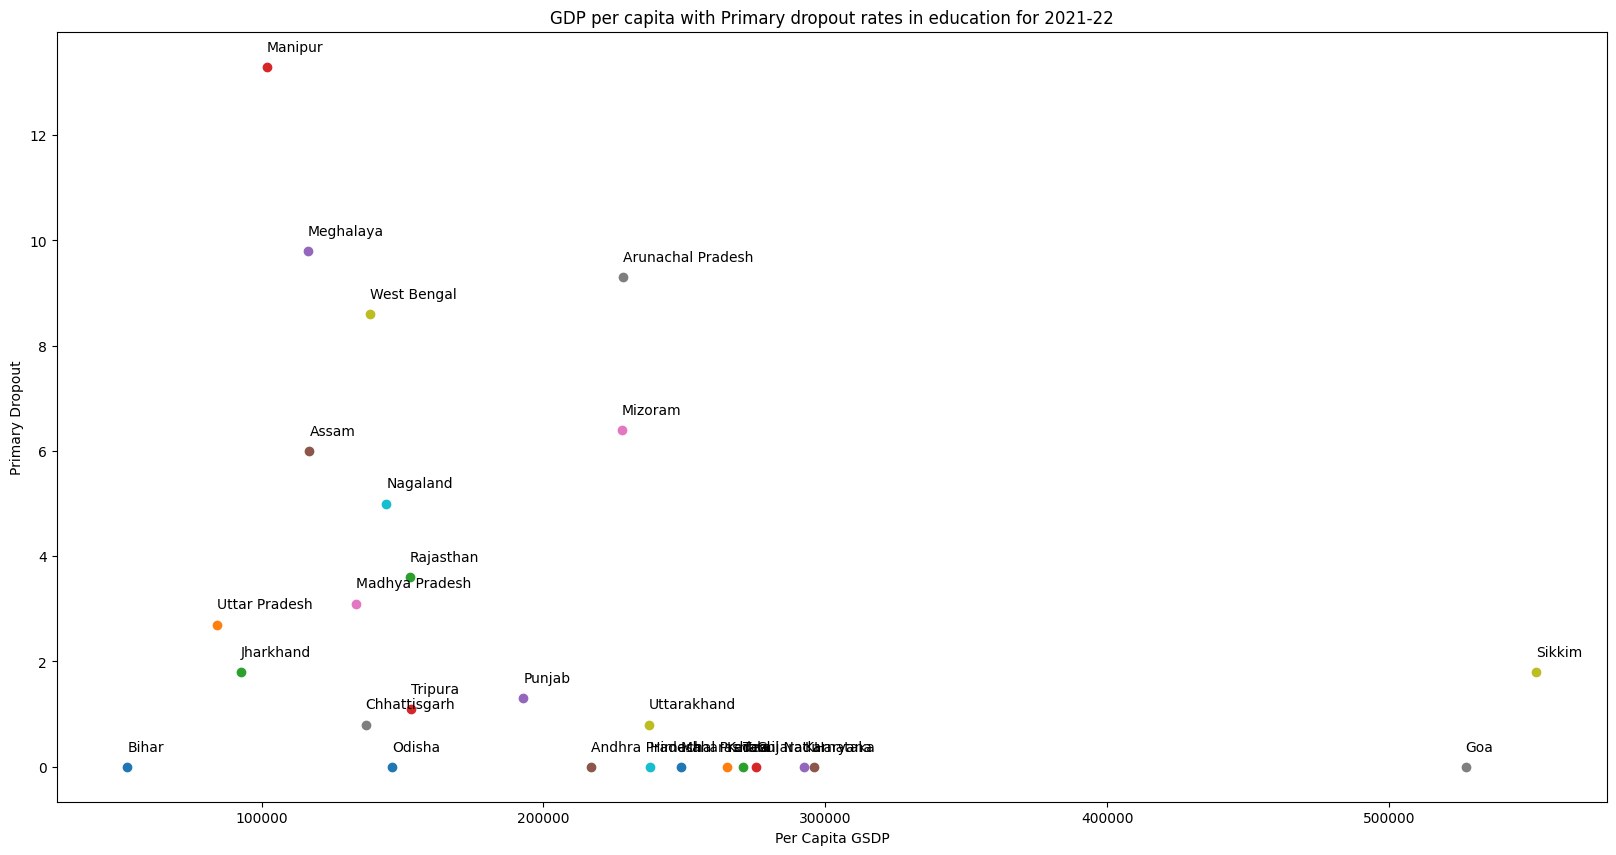

In [87]:
plt.figure(figsize=(20,10))
for i,states in enumerate(df_GDP_and_education['State'].tolist()):
    x = df_GDP_and_education['Per Capita GSDP (Rs.)'].tolist()[i]
    y = df_GDP_and_education['Primary 2021-22'].tolist()[i]
    plt.scatter(x, y)
    plt.text(x+.3, y+.3, states)
plt.ylabel('Primary Dropout')
plt.xlabel('Per Capita GSDP')
plt.title('GDP per capita with Primary dropout rates in education for 2021-22')
plt.show()

#### Sactter plot for GDP per capita with `Upper Primary` dropout rates

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


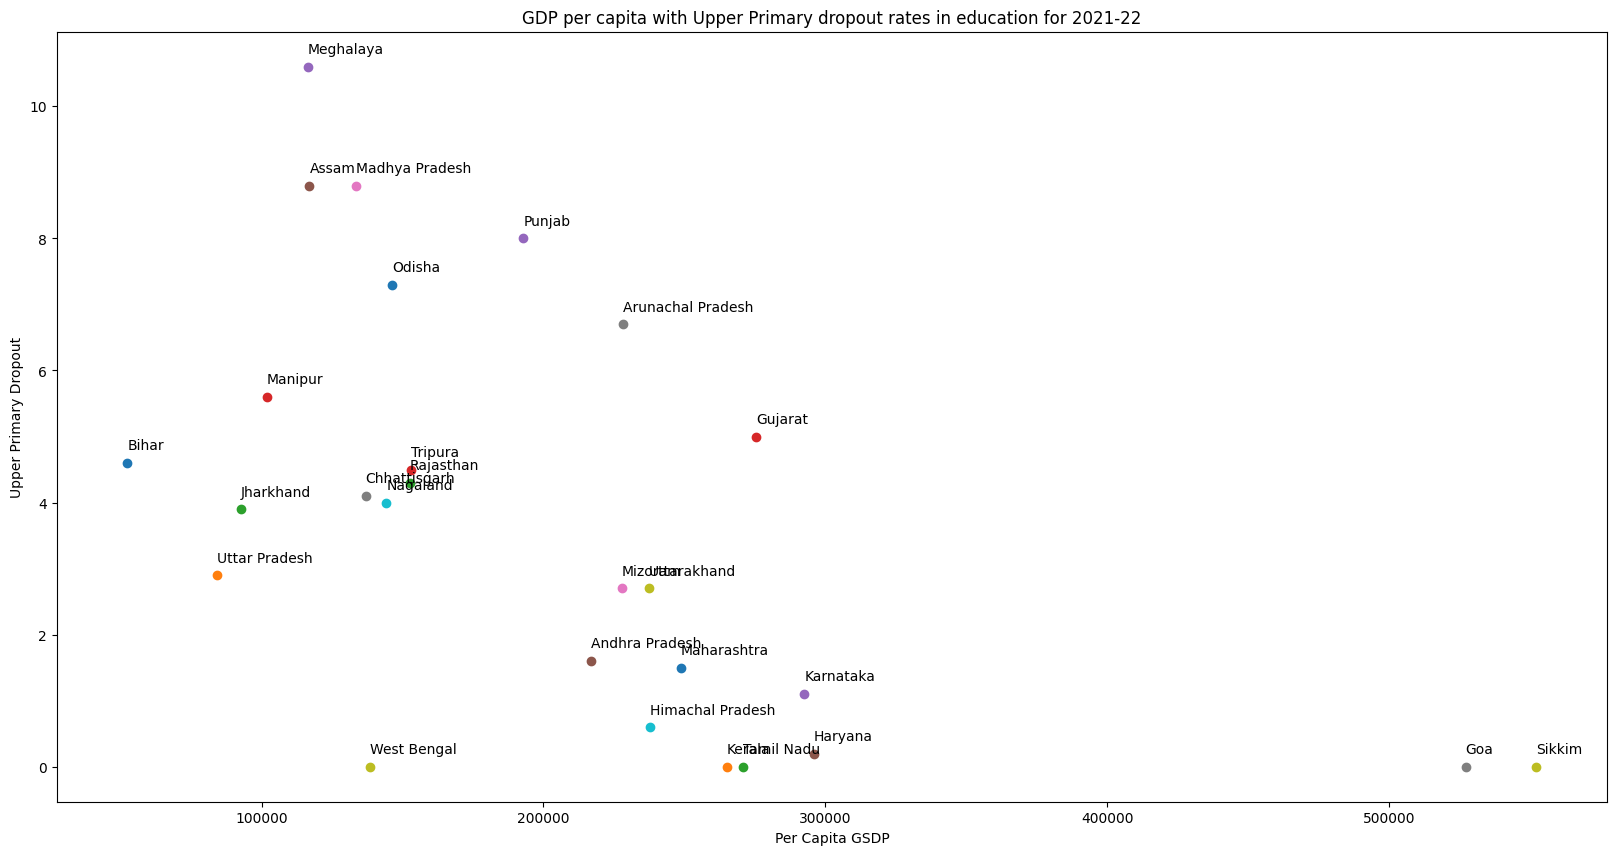

In [88]:
plt.figure(figsize=(20,10))
for i,states in enumerate(df_GDP_and_education['State'].tolist()):
    x = df_GDP_and_education['Per Capita GSDP (Rs.)'].tolist()[i]
    y = df_GDP_and_education['Upper Primary 2021-22'].tolist()[i]
    plt.scatter(x, y)
    plt.text(x+.2, y+.2, states)
plt.ylabel('Upper Primary Dropout')
plt.xlabel('Per Capita GSDP')
plt.title('GDP per capita with Upper Primary dropout rates in education for 2021-22')
plt.show()

#### Sactter plot for GDP per capita with `Secondary` dropout rates 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


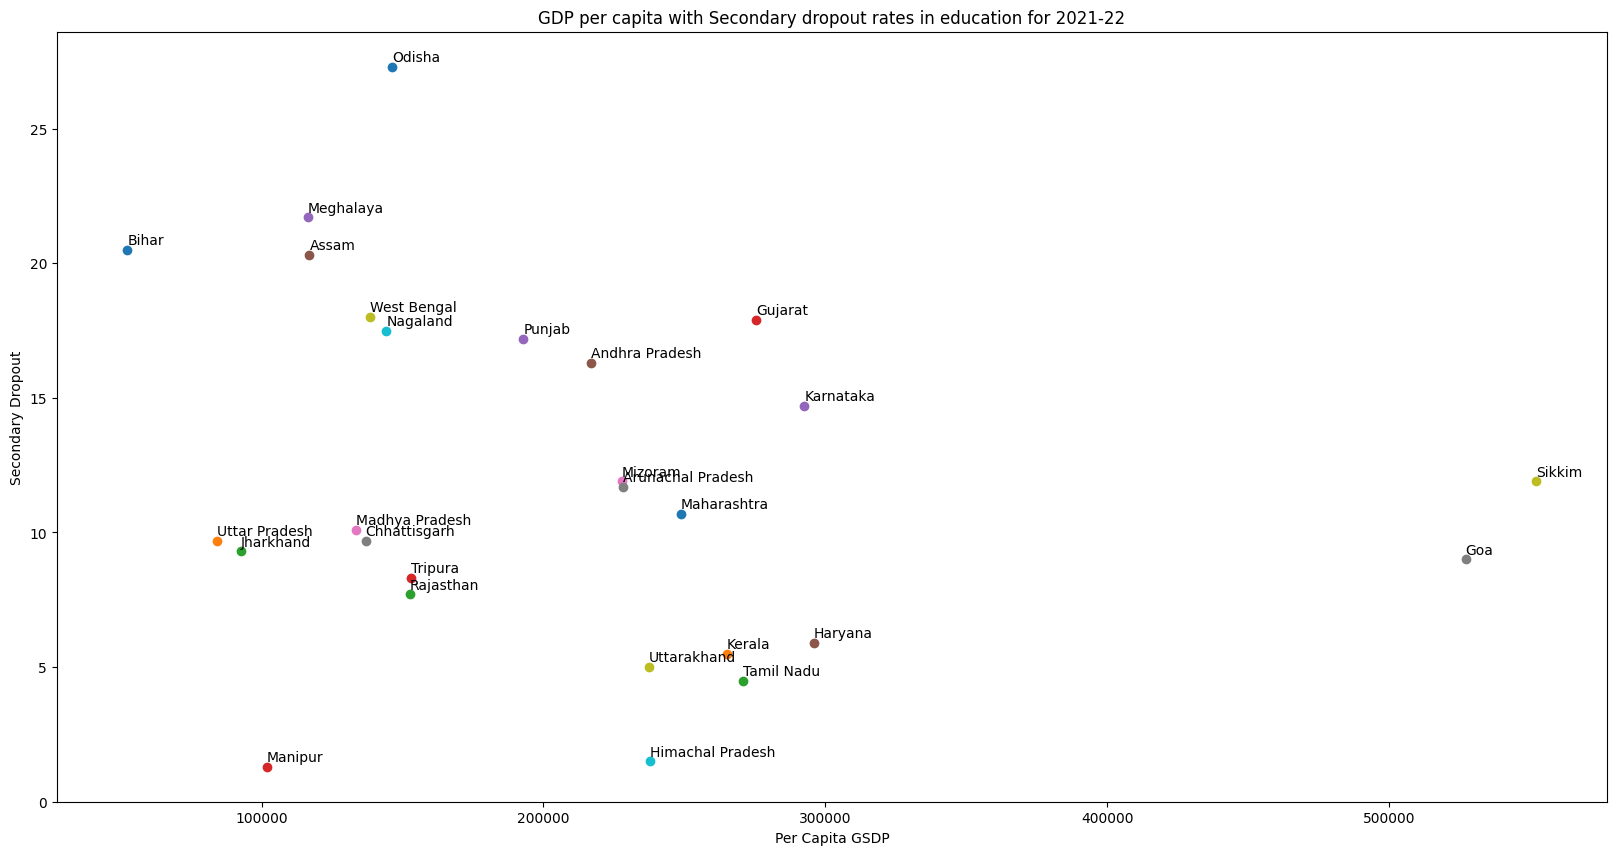

In [89]:
plt.figure(figsize=(20,10))
for i,states in enumerate(df_GDP_and_education['State'].tolist()):
    x = df_GDP_and_education['Per Capita GSDP (Rs.)'].tolist()[i]
    y = df_GDP_and_education['Secondary 2021-22'].tolist()[i]
    plt.scatter(x, y)
    plt.text(x+.2, y+.2, states)
plt.ylabel('Secondary Dropout')
plt.xlabel('Per Capita GSDP')
plt.title('GDP per capita with Secondary dropout rates in education for 2021-22')
plt.show()

### Analysis
We can see that the drop out rates are `negatively correlated` with the per capita GDP of the states
The higher the per capita GDP, the lower the dropout rates in Primary, Upper primary and Secondary education. 

### Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?

In [90]:
# Creating dataframe with sector wise GDP contribution and drop out rates
df_dropout_sector = df_GDP_and_education[['State','Primary','Secondary','Tertiary','Primary 2021-22','Upper Primary 2021-22','Secondary 2021-22']]
df_dropout_sector

,State,Primary,Secondary,Tertiary,Primary 2021-22,Upper Primary 2021-22,Secondary 2021-22
0,Bihar,16072072,11570756,36590136,0.00,4.60,20.50
1,Uttar Pradesh,48321366,48834872,83573385,2.70,2.90,9.70
2,Jharkhand,8127532,10683422,14510659,1.80,3.90,9.30
3,Manipur,923521,292326,2235446,13.30,5.60,1.30
4,Meghalaya,845141,642882,2177826,9.80,10.60,21.70
5,Assam,12840330,7781500,16881568,6.00,8.80,20.30
6,Madhya Pradesh,51005234,20554887,35055890,3.10,8.80,10.10
7,Chhattisgarh,11997894,12912853,13632900,0.80,4.10,9.70
8,West Bengal,28511737,30035693,71398427,8.60,0.00,18.00
9,Nagaland,792662,344894,1922773,5.00,4.00,17.50


In [91]:
# Convert non-numeric columns to numeric
df_dropout_sector['State'] = pd.to_numeric(df_dropout_sector['State'], errors='coerce')

In [92]:
# Correlation matrix
df_dropout_sector.corr(method='pearson')

,State,Primary,Secondary,Tertiary,Primary 2021-22,Upper Primary 2021-22,Secondary 2021-22
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary,NaN,1.00,0.74,0.74,-0.28,-0.02,0.12
Secondary,NaN,0.74,1.00,0.85,-0.39,-0.26,0.00
Tertiary,NaN,0.74,0.85,1.00,-0.33,-0.36,-0.02
Primary 2021-22,NaN,-0.28,-0.39,-0.33,1.00,0.43,0.06
Upper Primary 2021-22,NaN,-0.02,-0.26,-0.36,0.43,1.00,0.48
Secondary 2021-22,NaN,0.12,0.00,-0.02,0.06,0.48,1.00


#### Analysis from the above matrix
1. Primary dropout rates is negatively correlated with every sectors. Specifically with the Secondary and Tertiary sectors. That means the more primary dropout rates the lesser contribution from Secondary and Tertiary sectors into the GDP.
2. Upper Primary dropout rates are barely correlated with any sectors. Though it is little negatively correlated with Secondary and Tertiary sectors.
3. The Secondary dropout rates are slightly negatively correlated with every sectors. 

#### Correlation between population and dropout rates

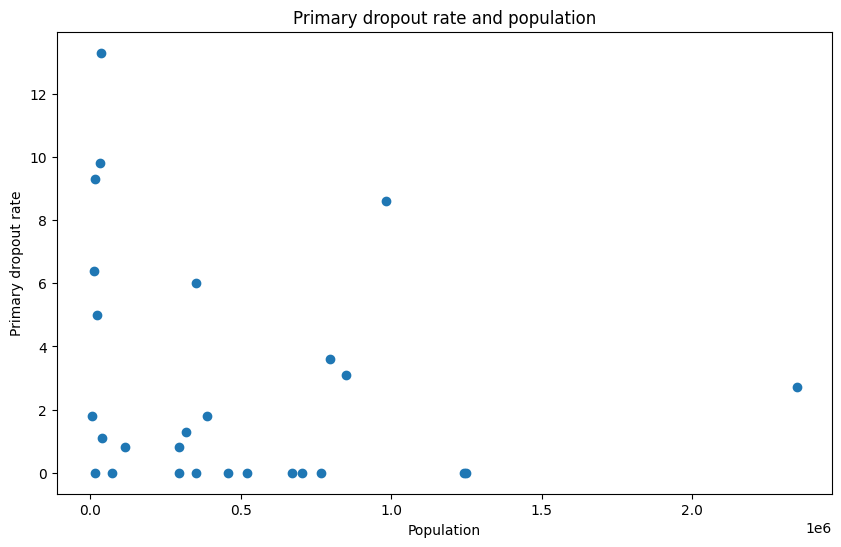

In [93]:
# Scatter plot for Primary dropout rate and population
plt.figure(figsize=(10,6))
plt.scatter(x=df_GDP_and_education['Population'],y=df_GDP_and_education['Primary 2021-22'])
plt.ylabel('Primary dropout rate')
plt.xlabel('Population')
plt.title('Primary dropout rate and population')
plt.show()

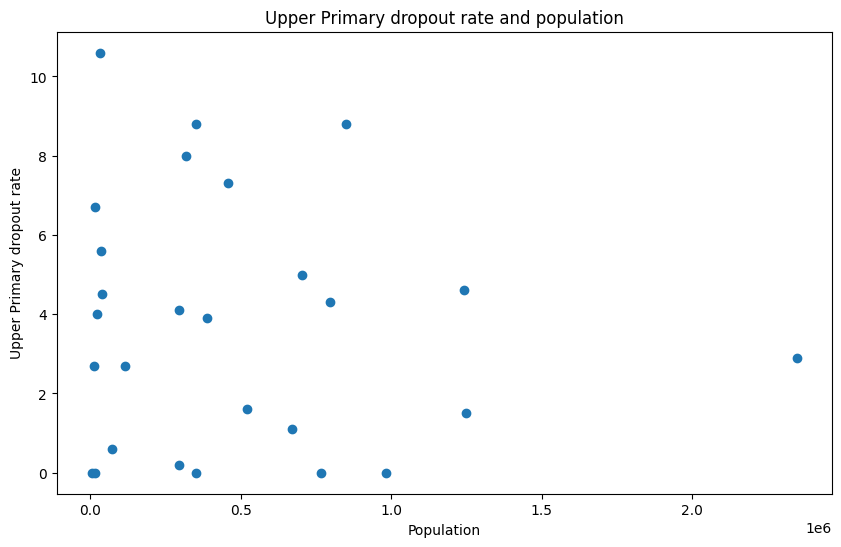

In [94]:
# Scatter plot for Upper Primary dropout rate and population
plt.figure(figsize=(10,6))
plt.scatter(x=df_GDP_and_education['Population'],y=df_GDP_and_education['Upper Primary 2021-22'])
plt.ylabel('Upper Primary dropout rate')
plt.xlabel('Population')
plt.title('Upper Primary dropout rate and population')
plt.show()

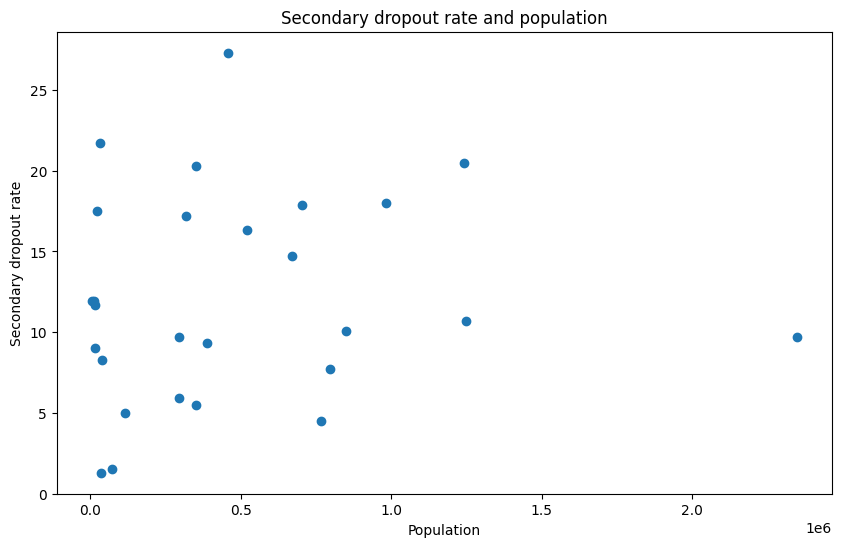

In [95]:
# Scatter plot for Secondary Primary dropout rate and population
plt.figure(figsize=(10,6))
plt.scatter(x=df_GDP_and_education['Population'],y=df_GDP_and_education['Secondary 2021-22'])
plt.ylabel('Secondary dropout rate')
plt.xlabel('Population')
plt.title('Secondary dropout rate and population')
plt.show()